In [1]:
import scipy as scipy
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import seaborn as sns

# Important comments/resume
YOU SHOULD PUT IN THE FOLDER THE RIGHT DAVOS AND LAEGEREN FILES BECAUSE IT IS TOO HEAVY TO PUSH

We should maybe select a higher treshold for VPD because its relationship with GPP is not clear

Also wondering if we should use an other indicator than GPP (NPP, SIF...)

We however see that SM is more discriminant than VPD, but might be due to the things discussed above.

Chamau: 4-9

cha_sgeren : lae_daily['Month'].isin([4,5,6,7]))] better than 4-9

Davos : 

# Load data

In [32]:
cha_mat= h5py.File("CHAMAU.mat", 'r')
cha_mat

<HDF5 file "CHAMAU.mat" (mode r)>

In [ ]:
print(list(cha_mat.keys()))

['#refs#', 'ALB', 'ANPP_H', 'ANPP_L', 'AgeDL_H', 'AgeDL_L', 'AgeL_H', 'AgeL_L', 'AgePl_H', 'AgePl_L', 'AgrHarNut', 'Aice', 'An_H', 'An_L', 'Ared', 'Asur', 'Axyl_H', 'Axyl_L', 'BA_H', 'BA_L', 'BLit', 'B_H', 'B_L', 'Bfac_dayH', 'Bfac_dayL', 'Bfac_lo_H', 'Bfac_lo_L', 'Bfac_ls_H', 'Bfac_ls_L', 'Bfac_weekH', 'Bfac_weekL', 'Bio_Zs', 'CASE_ROOT', 'CK1', 'CK2', 'CO2', 'CT_H', 'CT_L', 'Ca', 'Cbare', 'Ccrown', 'CcrownFIX', 'Ccrown_t', 'Ci_shdH', 'Ci_shdL', 'Ci_sunH', 'Ci_sunL', 'Cice', 'Cicew', 'Ck', 'CkC_ALL', 'CkC_H', 'CkC_L', 'CkK_H', 'CkK_L', 'CkN_H', 'CkN_L', 'CkP_H', 'CkP_L', 'Cl_H', 'Cl_L', 'Color_Class', 'Computational_Time', 'Crock', 'Csno', 'Csnow', 'Curb', 'Cwat', 'Cx_H', 'Cx_L', 'DQ', 'DSE_H', 'DSE_L', 'DT', 'Datam', 'Date', 'Deb_Par', 'DeltaGMT', 'Directory', 'Do_H', 'Do_L', 'Dr_H', 'Dr_L', 'Ds', 'Dz', 'EG', 'EICE', 'EIn_H', 'EIn_L', 'EIn_rock', 'EIn_urb', 'EK', 'ELitter', 'ESN', 'ESN_In', 'ET', 'ETen', 'EWAT', 'EvL_Zs', 'ExEM', 'FI_H', 'FI_L', 'FNC_H', 'FNC_L', 'FROCK', 'G', 'Gfin'

In [37]:
cha = pd.DataFrame(
    { 
        #'NPP': cha_mat['NPP_L'][:].squeeze(), #Net primary production for low vegetation calculated each day with the T&C model
        'Ta': cha_mat['Ta'][:].squeeze(),
        'VPD': cha_mat['Ds'][:].squeeze(), #in Pa
        'SM': cha_mat['OL'][:].squeeze(), # OF first soil layer (surface) #OL=low veget #OH=high veget
        'PARB': cha_mat['PARB'][:].squeeze(), #direct radiation
        'PARD': cha_mat['PARD'][:].squeeze(), #diffuse radiation
        #'SIF':cha_mat['SIF_L'][:].squeeze() #CHA=grassland--> low vegetation # valeurs chaque jour donc on ajoute après
    }
)
cha['PAR']= cha['PARB'] + cha['PARD']
cha

,Ta,VPD,SM,PARB,PARD,PAR
0,2.2570,6.134699,0.000000,0.0,0.0,0.0
1,2.2945,6.069162,0.432367,0.0,0.0,0.0
2,2.2490,13.289646,0.431340,0.0,0.0,0.0
3,2.3290,17.970873,0.430682,0.0,0.0,0.0
4,2.7175,15.666741,0.430300,0.0,0.0,0.0
...,...,...,...,...,...,...
87643,-9.0715,11.282861,0.225039,0.0,0.0,0.0
87644,-9.7030,13.785815,0.224671,0.0,0.0,0.0
87645,-10.7695,15.669038,0.224328,0.0,0.0,0.0
87646,-9.3050,13.607474,0.223841,0.0,0.0,0.0


In [39]:
start_date = '2005-01-01 00:00:00' #pour trouver la date de début: matlab/inputs/timestamp
#2005 à 2023, toutes les 30 min dans le excel: 333 073 valeurs
# dans les résultats: 87  648 valeurs --> toutes les heures et pour une période 2 fois moins longue: 2005 à 2014
date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')
cha['Date'] = date_range
cha['Date_day'] = cha['Date'].dt.date
cha['Year'] = cha['Date'].dt.year
cha['Month'] = cha['Date'].dt.month
cha['Day'] = cha['Date'].dt.day
cha['Hour'] = cha['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans CHAMAU alors qu'elles vont jusqu'à 2023 dans les données de base
cha


C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\2867860223.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')


,Ta,VPD,SM,PARB,PARD,PAR,Date,Date_day,Year,Month,Day,Hour
0,2.2570,6.134699,0.000000,0.0,0.0,0.0,2005-01-01 00:00:00,2005-01-01,2005,1,1,0
1,2.2945,6.069162,0.432367,0.0,0.0,0.0,2005-01-01 01:00:00,2005-01-01,2005,1,1,1
2,2.2490,13.289646,0.431340,0.0,0.0,0.0,2005-01-01 02:00:00,2005-01-01,2005,1,1,2
3,2.3290,17.970873,0.430682,0.0,0.0,0.0,2005-01-01 03:00:00,2005-01-01,2005,1,1,3
4,2.7175,15.666741,0.430300,0.0,0.0,0.0,2005-01-01 04:00:00,2005-01-01,2005,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
87643,-9.0715,11.282861,0.225039,0.0,0.0,0.0,2014-12-31 19:00:00,2014-12-31,2014,12,31,19
87644,-9.7030,13.785815,0.224671,0.0,0.0,0.0,2014-12-31 20:00:00,2014-12-31,2014,12,31,20
87645,-10.7695,15.669038,0.224328,0.0,0.0,0.0,2014-12-31 21:00:00,2014-12-31,2014,12,31,21
87646,-9.3050,13.607474,0.223841,0.0,0.0,0.0,2014-12-31 22:00:00,2014-12-31,2014,12,31,22


(1, 3653)
(1, 87648)


<Axes: >

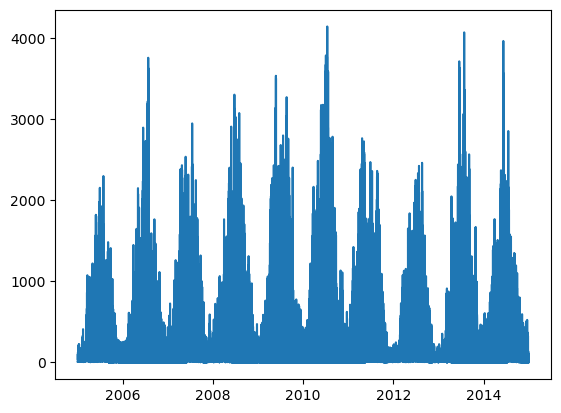

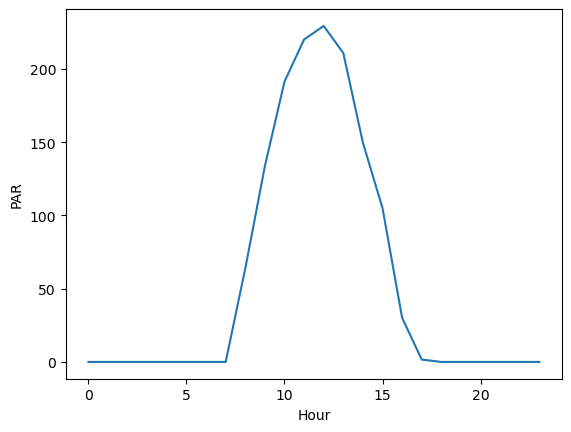

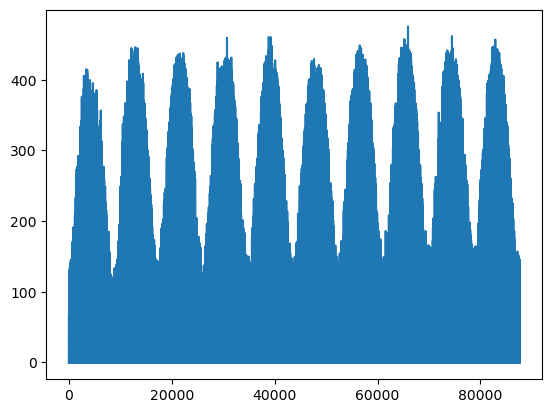

In [54]:
plt.figure()
plt.plot(cha['Date'], cha['VPD'])

cha_2005 = cha[(cha['Year'] == 2005) & (cha['Month'] == 10)& (cha['Day'] == 20)]

# Graphe GPP vs Date pour juin 2005
plt.figure()
plt.plot(cha_2005['Hour'], cha_2005['PAR'])
plt.ylabel('PAR')
plt.xlabel('Hour')

print(cha_mat['NPP_L'][:].shape)
print(cha_mat['OL'][:].shape)
plt.figure()
cha['PAR'].plot()

On ne prendra que les data de 8h à 16h

# Daily mean

<Axes: >

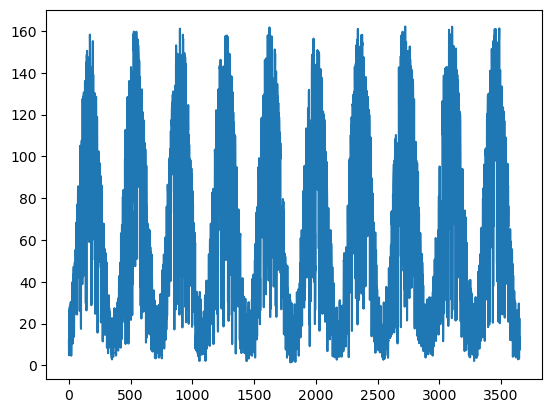

In [43]:
# Groupby day to have daily mean
cha_daily = cha.groupby('Date_day')[['Ta','VPD','SM', 'PAR']].mean().reset_index()

#rearrange
cha_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
cha_daily['Date'] = pd.to_datetime(cha_daily['Date'])
cha_daily['Year'] = cha_daily['Date'].dt.year
cha_daily['Month'] = cha_daily['Date'].dt.month
cha_daily['Day'] = cha_daily['Date'].dt.day

cha_daily['PAR'].plot()

In [55]:
# Chamau is grassland so we will use net primary production low vegetation
# 'Ta': cha_mat['Ta'][:].squeeze(),
cha_mat['NPP_L'][0][1:]
cha_daily['NPP'] = cha_mat['NPP_L'][0][1:].squeeze()
cha_daily['SIF'] = cha_mat['Slf_L'][0][1:].squeeze()

#Problème: NPP a une longueur de 3652 alors que daily mean en a un de 3653. La première valeur est de 0 donc on l'enlève

Text(0, 0.5, 'NPP')

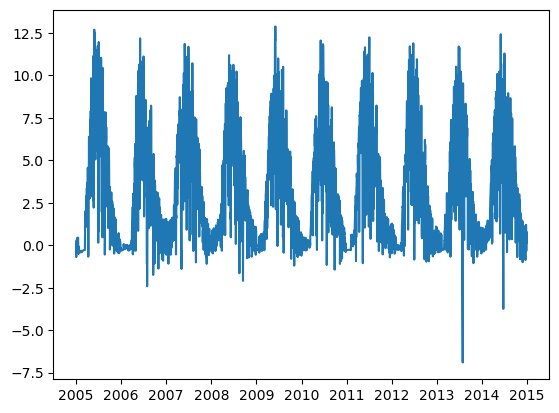

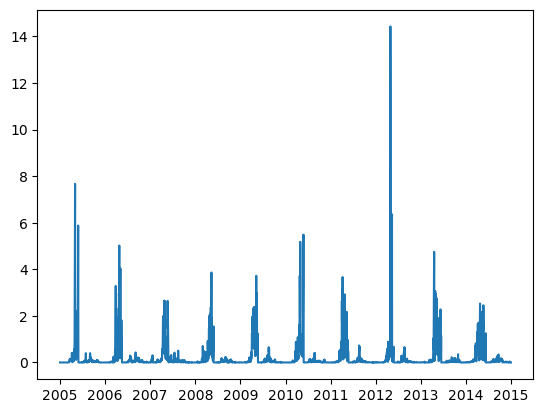

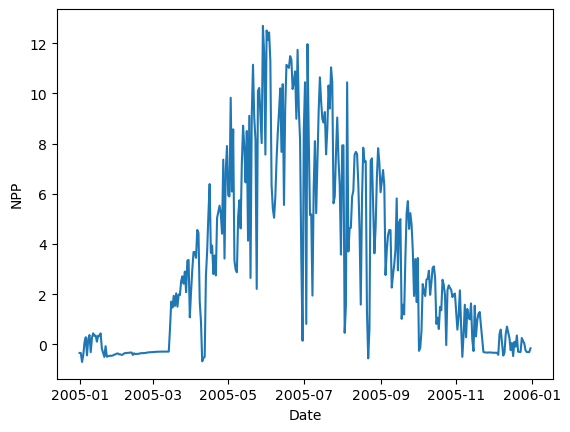

In [56]:
plt.plot(cha_daily['Date'], cha_daily['NPP'])
plt.figure()
plt.plot(cha_daily['Date'], cha_daily['SIF'])
plt.figure()
cha_daily_year=cha_daily[(cha_daily['Year'] == 2005)]
cha_daily_year

plt.plot(cha_daily_year['Date'], cha_daily_year['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

# Filter data

In [136]:
#Filter the daily data
cha_filtered=cha_daily[(cha_daily['VPD']>500) & (cha_daily['Ta']>15) & (cha_daily['PAR']>60) &(cha_daily['Month'].isin([5, 6, 7,8, 9, 10]))]
cha_filtered

,Date,Ta,VPD,SM,PAR,Year,Month,Day,NPP,SIF
144,2005-05-25,16.486125,541.790846,0.394809,139.774863,2005,5,25,10.096085,0.660965
145,2005-05-26,19.077437,654.859749,0.376440,148.673829,2005,5,26,10.220479,2.707251
146,2005-05-27,21.047333,690.378347,0.364712,143.816213,2005,5,27,9.122543,5.033160
147,2005-05-28,21.948625,772.772026,0.354944,150.480336,2005,5,28,8.021781,5.880713
148,2005-05-29,21.980708,723.018001,0.351671,140.704514,2005,5,29,12.690010,2.893773
...,...,...,...,...,...,...,...,...,...,...
3498,2014-07-31,19.829896,641.036763,0.404238,121.075896,2014,7,31,0.745808,0.015846
3499,2014-08-01,18.754167,540.735582,0.382084,123.408811,2014,8,1,8.958157,0.044664
3506,2014-08-08,20.871021,506.666300,0.361900,133.461665,2014,8,8,4.377038,0.054204
3507,2014-08-09,20.869417,542.470531,0.355314,108.136368,2014,8,9,4.845592,0.122239


There are 556 observations/days between 2005 and 2014 respecting our three conditions.

# Divide VPD and SM in bins

{'whiskers': [<matplotlib.lines.Line2D at 0x2cca1ce85f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cca1ce8b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cca1ce8320>],
 'medians': [<matplotlib.lines.Line2D at 0x2cca1ce9160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cca1ce93d0>],
 'means': []}

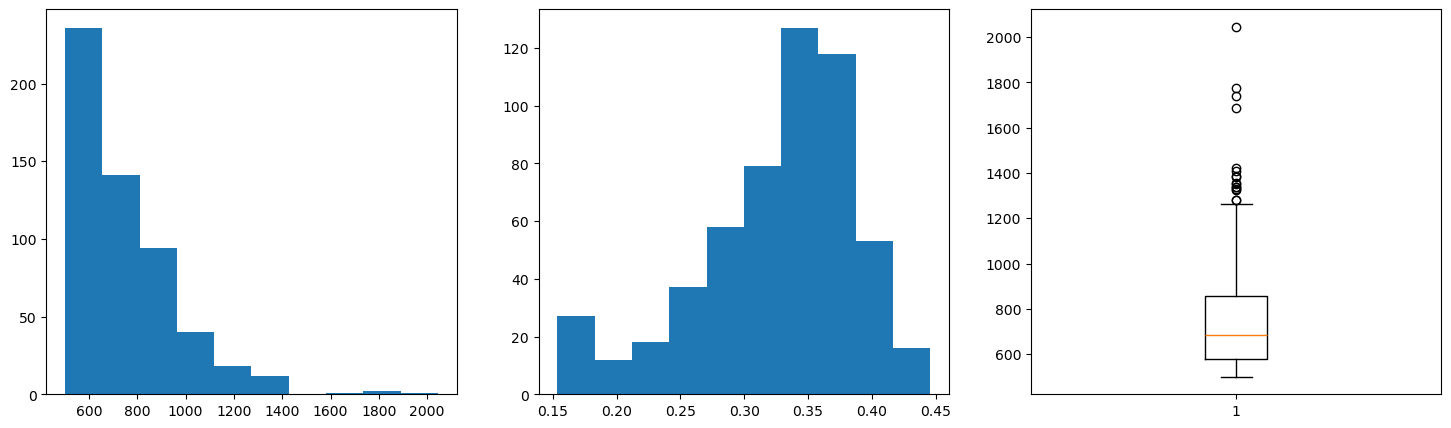

In [137]:
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(cha_filtered['VPD'])
plt.subplot(1, 3, 2)
plt.hist(cha_filtered['SM'])
plt.subplot(1, 3, 3)
plt.boxplot(cha_filtered['VPD'])

In [138]:
#Divide in bins
cha_filtered = cha_filtered.copy() #to have an explicit copy (if not it raises an error)
cha_filtered['SM_bin'] = pd.qcut(cha_filtered['SM'], q=5, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
cha_filtered['VPD_bin'] = pd.qcut(cha_filtered['VPD'], q=5, labels=False) + 1
cha_filtered

,Date,Ta,VPD,SM,PAR,Year,Month,Day,NPP,SIF,SM_bin,VPD_bin
144,2005-05-25,16.486125,541.790846,0.394809,139.774863,2005,5,25,10.096085,0.660965,5,1
145,2005-05-26,19.077437,654.859749,0.376440,148.673829,2005,5,26,10.220479,2.707251,4,3
146,2005-05-27,21.047333,690.378347,0.364712,143.816213,2005,5,27,9.122543,5.033160,4,3
147,2005-05-28,21.948625,772.772026,0.354944,150.480336,2005,5,28,8.021781,5.880713,4,4
148,2005-05-29,21.980708,723.018001,0.351671,140.704514,2005,5,29,12.690010,2.893773,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3498,2014-07-31,19.829896,641.036763,0.404238,121.075896,2014,7,31,0.745808,0.015846,5,3
3499,2014-08-01,18.754167,540.735582,0.382084,123.408811,2014,8,1,8.958157,0.044664,5,1
3506,2014-08-08,20.871021,506.666300,0.361900,133.461665,2014,8,8,4.377038,0.054204,4,1
3507,2014-08-09,20.869417,542.470531,0.355314,108.136368,2014,8,9,4.845592,0.122239,4,1


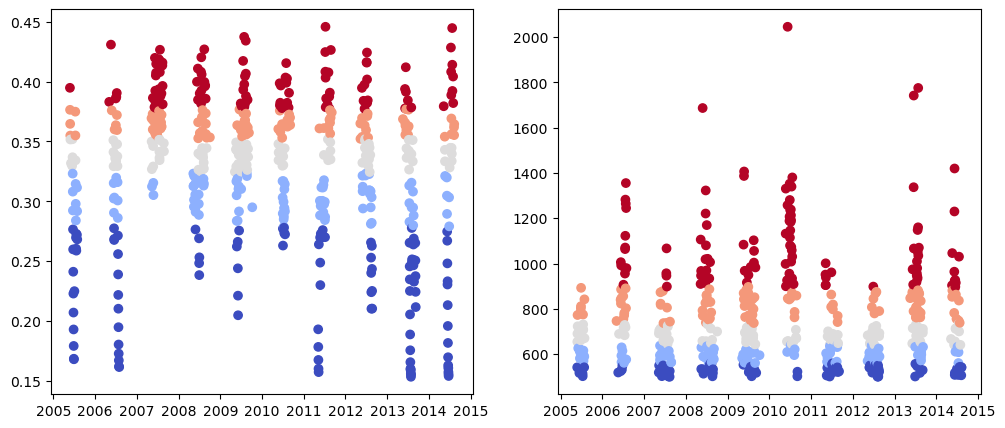

In [139]:
# verification
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['SM'],c=cha_filtered['SM_bin'], cmap='coolwarm')
plt.subplot(1,2,2)

plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['VPD'],c=cha_filtered['VPD_bin'], cmap='coolwarm')

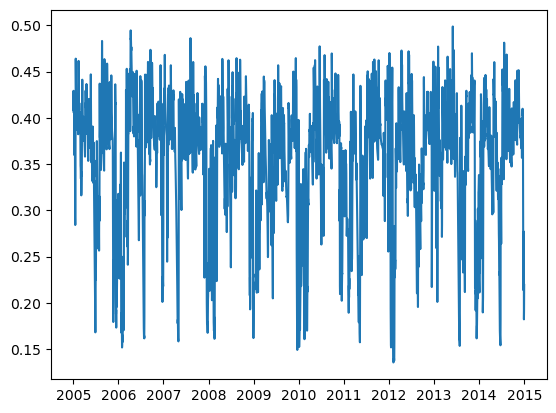

In [64]:
plt.plot(cha_daily['Date'], cha_daily['SM'])

 # Relationships between GPP and VPD

Text(0, 0.5, 'NPP')

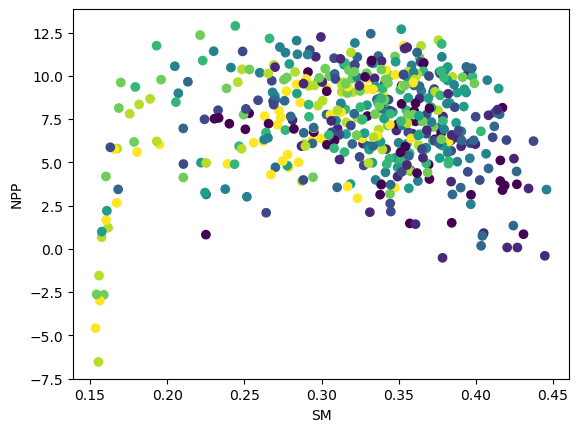

In [72]:
plt.scatter(cha_filtered['SM'], cha_filtered['NPP'], c=cha_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('SM')
plt.ylabel('NPP')

The relationship is not clear, we should maybe use a higher threshold.

    SM_bin  VPD_bin       NPP       SIF
0        1        1  7.125658  0.080376
1        1        2  7.274337  0.110708
2        1        3  7.013799  0.097767
3        1        4  7.656914  0.244242
4        1        5  5.075355  0.247400
5        2        1  8.368764  0.087795
6        2        2  7.928153  0.093250
7        2        3  8.899467  0.098888
8        2        4  8.538165  0.323827
9        2        5  7.859014  0.218440
10       3        1  7.379896  0.078880
11       3        2  6.936260  0.208152
12       3        3  6.840519  0.296639
13       3        4  8.061589  0.382958
14       3        5  7.520116  0.650811
15       4        1  6.979906  0.164191
16       4        2  8.109151  0.413948
17       4        3  7.785039  0.768386
18       4        4  7.156153  0.533449
19       4        5  8.706362  0.328551
20       5        1  4.410219  0.054195
21       5        2  6.042182  0.237680
22       5        3  7.520552  0.289795
23       5        4  8.400541  0.163278


C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\2828937438.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


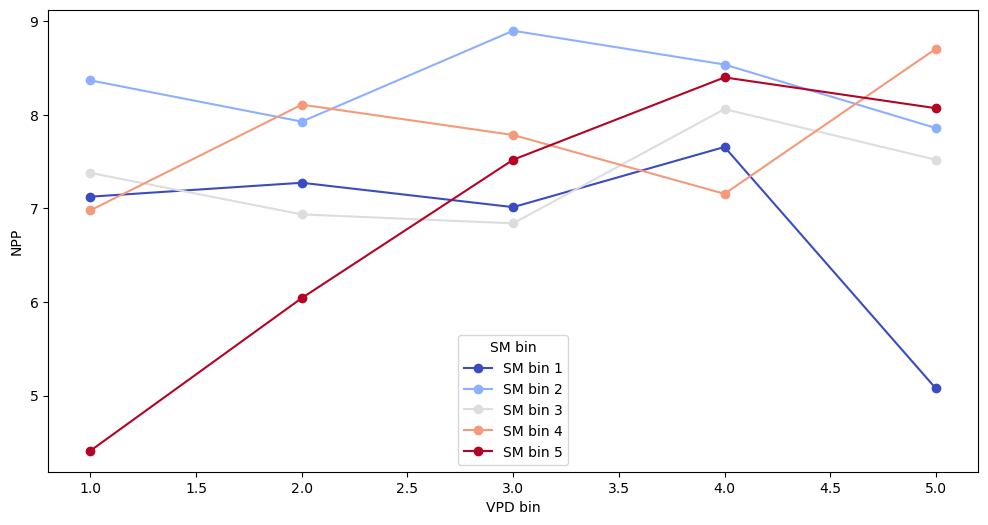

In [ ]:
# for each combination of bins
grouped = cha_filtered.groupby(['SM_bin', 'VPD_bin'])[['NPP', 'SIF']].mean().reset_index()
print(grouped)

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 5)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin')
plt.ylabel('NPP')
plt.show()   

It is strange that GPP seems to increase with VPD

 # Relationships between GPP and soil moisture

Text(0, 0.5, 'NPP')

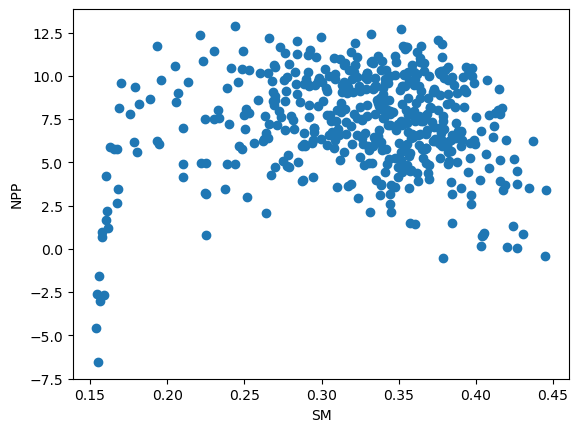

In [75]:
plt.scatter(cha_filtered['SM'], cha_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\4124947001.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


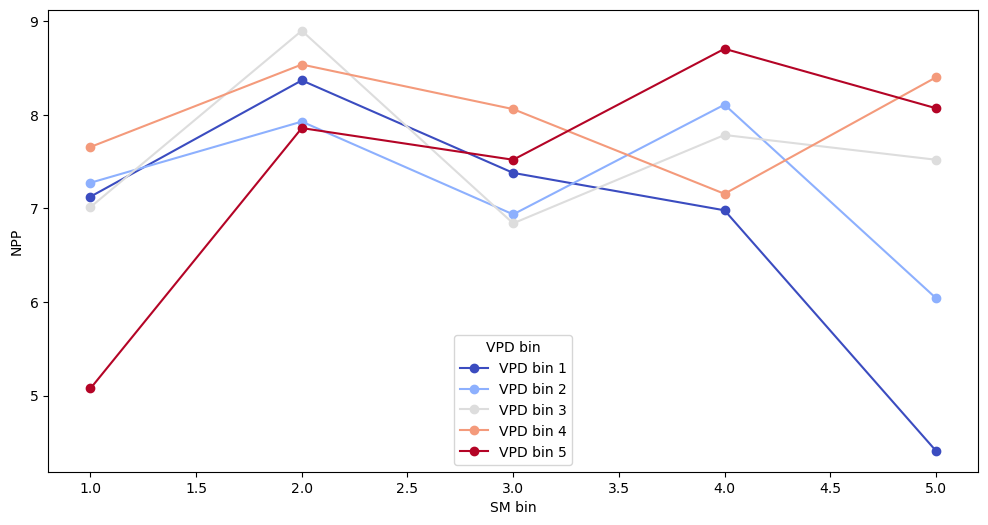

In [ ]:
plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('NPP')
plt.show() 

Here, soil moisture more discriminant than VPD. 

# relationship between sif and sm

Text(0, 0.5, 'SIF')

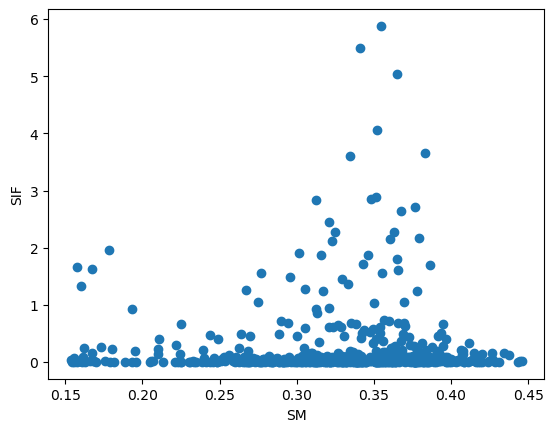

In [82]:
plt.scatter(cha_filtered['SM'], cha_filtered['SIF'])
plt.xlabel('SM')
plt.ylabel('SIF')

C:\Users\moeag\AppData\Local\Temp\ipykernel_31948\2246290060.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


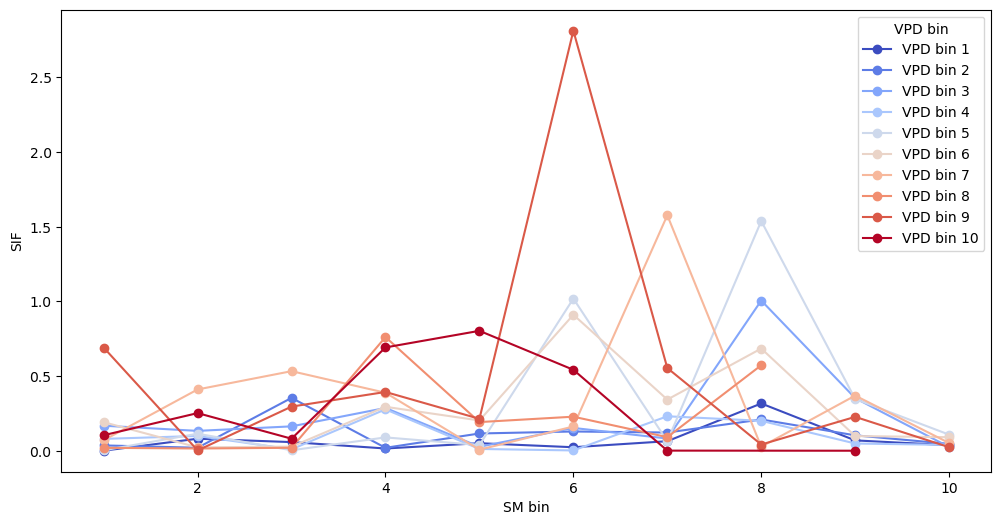

In [ ]:
plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['SIF'] ,
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('SIF')
plt.show() 

# Heatmap

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

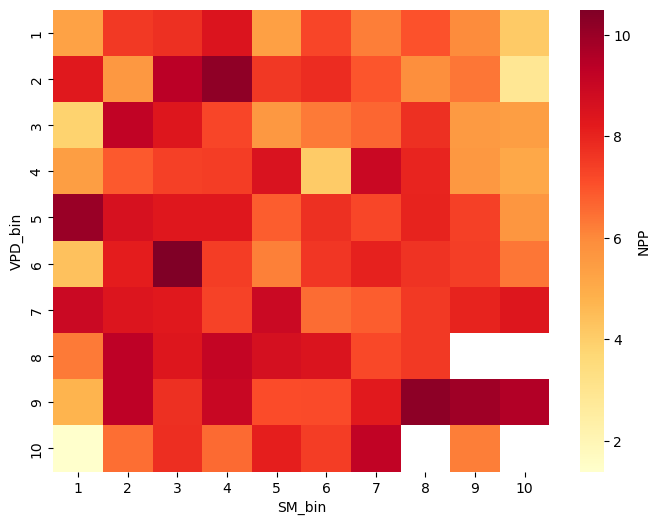

In [ ]:
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)

It is strange that GPP seems to increase with VPD. However, we also see that SM is discriminant here.

# VPD limitation on GPP without coupling and same for SM (figure 3f, Liu et al.) TO IMPROVE

We used the approach 1 : we calculate the difference between SIF at the highest VPD bin and lowest VPD bin in each SM bin to derive the .SIF(VPD|SM) cf paper for the complete calcul

We could have used the 2nd approach, but we estimated that there were not enough points to do a linear regression, and it is the 1st approach that is shown in their paper.

However, considering the irregular relationship between GPP and VPD, we could have used approach 2 to smooth a bit, or a non linear approach

In [ ]:
# for each bin of SM, difference of GPP between max bin vpd and min bin vpd
delta_gpp_vpd = []
for sm_bin in sorted(grouped['SM_bin'].unique()):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    
    if not subset.empty:
        min_vpd_bin = subset['VPD_bin'].min()
        max_vpd_bin = subset['VPD_bin'].max()

        gpp_min = subset[subset['VPD_bin'] == min_vpd_bin]['GPP'].values
        gpp_max = subset[subset['VPD_bin'] == max_vpd_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_vpd.append({'SM_bin': sm_bin, 'delta_gpp_vpd': delta})

delta_gpp_vpd_df = pd.DataFrame(delta_gpp_vpd)

delta_gpp_vpd_df

,SM_bin,delta_gpp_vpd
0,1,2.614363
1,2,4.164804
2,3,4.623237
3,4,5.264993
4,5,8.709358
5,6,11.222955
6,7,10.189722
7,8,15.141427
8,9,11.781687
9,10,11.974750


In [ ]:
delta_gpp_sm = []

for vpd_bin in sorted(grouped['VPD_bin'].unique()):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    
    if not subset.empty:
        min_sm_bin = subset['SM_bin'].min()
        max_sm_bin = subset['SM_bin'].max()

        gpp_min = subset[subset['SM_bin'] == min_sm_bin]['GPP'].values
        gpp_max = subset[subset['SM_bin'] == max_sm_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_sm.append({'VPD_bin': vpd_bin, 'delta_gpp_sm': delta})

delta_gpp_sm_df = pd.DataFrame(delta_gpp_sm)

delta_gpp_sm_df

,VPD_bin,delta_gpp_sm
0,1,6.375977
1,2,5.685878
2,3,10.924427
3,4,6.481404
4,5,4.376720
5,6,8.850573
6,7,7.394696
7,8,9.293918
8,9,15.009371
9,10,14.552323


(1.6143634278038066, 16.14142710848528)

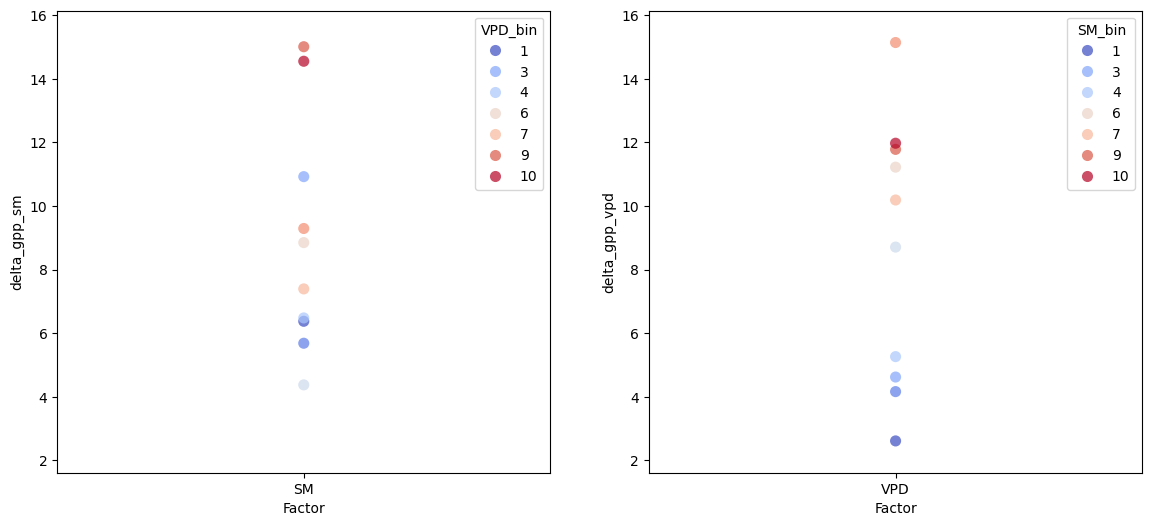

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique pour delta_gpp_sm en fonction des bins VPD
delta_gpp_sm_df['Factor'] = 'SM'
sns.stripplot(x='Factor', y='delta_gpp_sm', data=delta_gpp_sm_df, hue='VPD_bin', 
              palette='coolwarm', jitter=False,  size=8, alpha=0.7, ax=axes[0])

# Graphique pour delta_gpp_vpd en fonction des bins SM
delta_gpp_vpd_df['Factor'] = 'VPD'
sns.stripplot(x='Factor', y='delta_gpp_vpd', data=delta_gpp_vpd_df, hue='SM_bin', 
              palette='coolwarm', jitter=False, size=8, alpha=0.7, ax=axes[1])

#  même échelle
y_min = min(delta_gpp_sm_df['delta_gpp_sm'].min(), delta_gpp_vpd_df['delta_gpp_vpd'].min())
y_max = max(delta_gpp_sm_df['delta_gpp_sm'].max(), delta_gpp_vpd_df['delta_gpp_vpd'].max())

axes[0].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le premier graphique
axes[1].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le deuxième graphique


# Application to Laegeren

## Basic code

            Ta        VPD        SM  PARB  PARD  PAR                Date  \
0      -1.1580  45.228303  0.000000   0.0   0.0  0.0 2004-01-01 00:00:00   
1      -1.1985  36.439442  0.440986   0.0   0.0  0.0 2004-01-01 01:00:00   
2      -1.2895  33.900754  0.438458   0.0   0.0  0.0 2004-01-01 02:00:00   
3      -1.2185  38.006055  0.436001   0.0   0.0  0.0 2004-01-01 03:00:00   
4      -1.3365  31.382655  0.433098   0.0   0.0  0.0 2004-01-01 04:00:00   
...        ...        ...       ...   ...   ...  ...                 ...   
149035 -0.0970   0.012134  0.387809   0.0   0.0  0.0 2020-12-31 19:00:00   
149036  0.1760   0.012377  0.387893   0.0   0.0  0.0 2020-12-31 20:00:00   
149037  0.3345   0.012521  0.387990   0.0   0.0  0.0 2020-12-31 21:00:00   
149038  0.4765   0.012650  0.388044   0.0   0.0  0.0 2020-12-31 22:00:00   
149039  0.6000   0.012764  0.388207   0.0   0.0  0.0 2020-12-31 23:00:00   

          Date_day  Year  Month  Day  Hour  
0       2004-01-01  2004      1    1     0

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\429085363.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(lae), freq='H')


Text(0, 0.5, 'NPP')

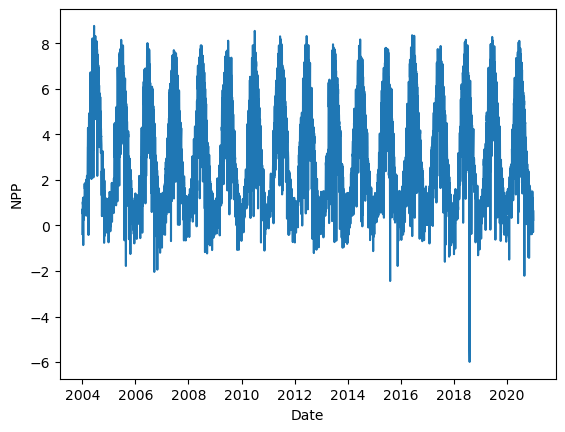

In [80]:
## Load data
lae_mat= h5py.File("LAEGEREN.mat", 'r')
lae_mat

lae = pd.DataFrame(
    { 
        'Ta': lae_mat['Ta'][:].squeeze(),
        'VPD': lae_mat['Ds'][:].squeeze(), #in Pa
        'SM': lae_mat['OH'][0][:].squeeze(), # first soil layer (surface) #high veget #OL=low veget
         'PARB': lae_mat['PARB'][:].squeeze(), #direct radiation
        'PARD': lae_mat['PARD'][:].squeeze(), #diffuse radiation
    }
)
lae['PAR']= lae['PARB'] + lae['PARD']

start_date = '2004-01-01 00:00:00' # de 2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(lae), freq='H')
lae['Date'] = date_range
lae['Date_day'] = lae['Date'].dt.date
lae['Year'] = lae['Date'].dt.year
lae['Month'] = lae['Date'].dt.month
lae['Day'] = lae['Date'].dt.day
lae['Hour'] = lae['Date'].dt.hour

#les data ne vont que jusqu'à 2020 dans lae alors qu'elles vont jusqu'à 2023 dans les données de base
print(lae)


## Daily mean
# Groupby day to have daily mean
lae_daily = lae.groupby('Date_day')[['Ta','VPD','SM', 'PAR']].mean().reset_index()

#rearrange
lae_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
lae_daily['Date'] = pd.to_datetime(lae_daily['Date'])
lae_daily['Year'] = lae_daily['Date'].dt.year
lae_daily['Month'] = lae_daily['Date'].dt.month
lae_daily['Day'] = lae_daily['Date'].dt.day

lae_daily['NPP'] = lae_mat['NPP_H'][1][1:] #high because mixed deciduous mountain forest #there were 2 columns, I took the one with positive values

plt.plot(lae_daily['Date'], lae_daily['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

<Axes: >

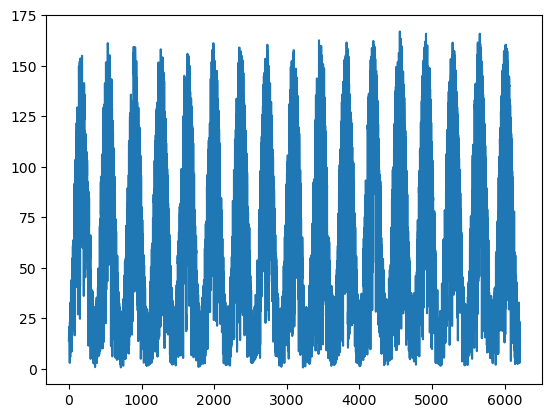

In [81]:
lae_daily['PAR'].plot()

           Date         Ta          VPD        SM         PAR  Year  Month  \
138  2004-05-18  16.444771   592.185033  0.393660  149.523211  2004      5   
139  2004-05-19  16.604938   579.386340  0.387942  139.263628  2004      5   
140  2004-05-20  17.545771   619.176780  0.382358  137.726429  2004      5   
158  2004-06-07  15.582583   529.238245  0.438615  148.626032  2004      6   
159  2004-06-08  19.535813   651.842475  0.428217  153.512859  2004      6   
...         ...        ...          ...       ...         ...   ...    ...   
6100 2020-09-13  21.379354   842.983108  0.306956  102.742977  2020      9   
6101 2020-09-14  22.308854   899.622597  0.302196  104.624759  2020      9   
6102 2020-09-15  22.860479   988.152268  0.297501  102.645323  2020      9   
6103 2020-09-16  21.972917  1024.660600  0.293381   72.102820  2020      9   
6104 2020-09-17  20.535542   824.078909  0.288969   97.677932  2020      9   

      Day       NPP  
138    18  6.711342  
139    19  7.420610

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\2857749489.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


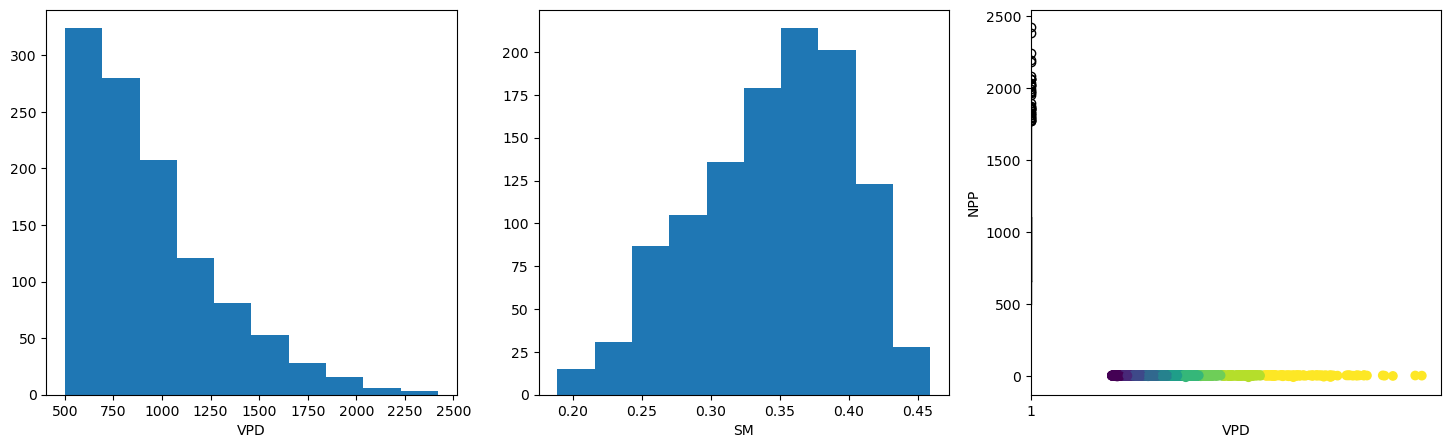

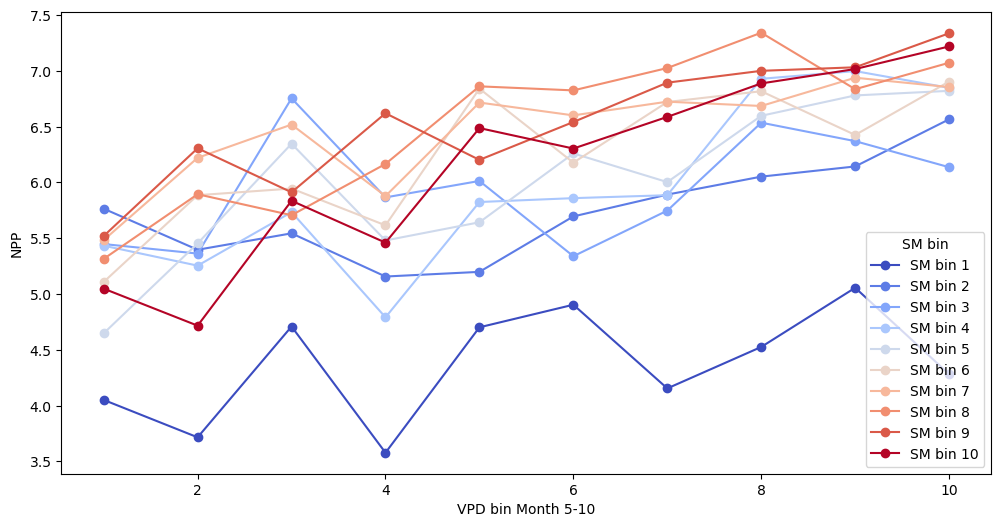

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\2857749489.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


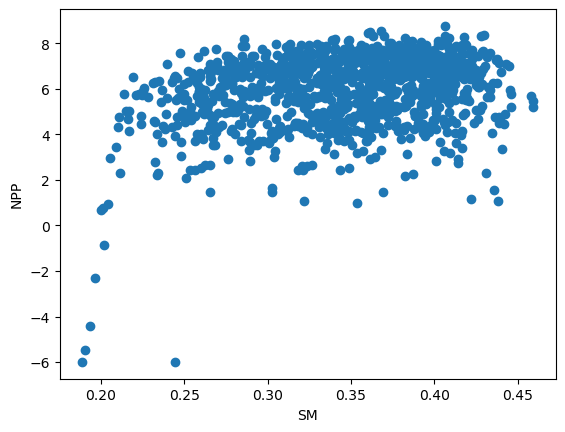

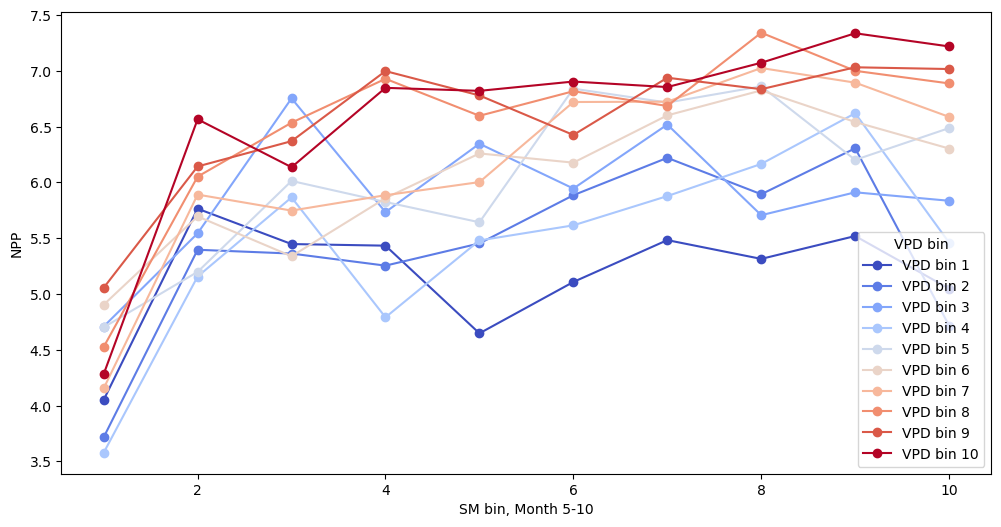

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

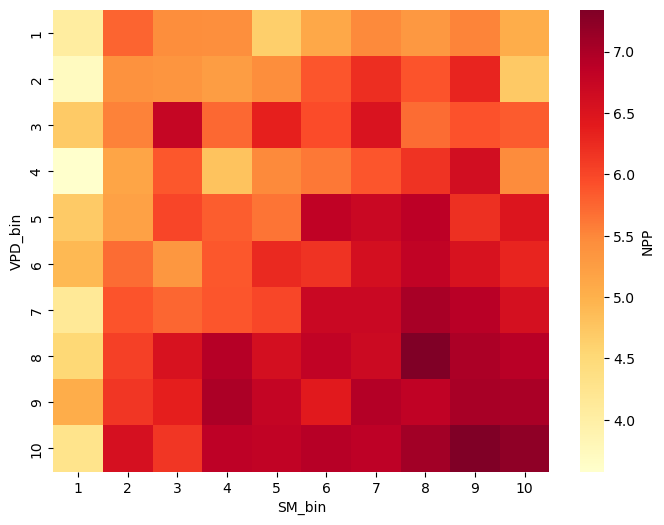

In [ ]:
## Filter data
lae_filtered=lae_daily[(lae_daily['VPD']>500) & (lae_daily['Ta']>15) & (lae_daily['PAR']>60) & (lae_daily['Month'].isin([5,6,7,8, 9, 10]))]
#& (cha_daily['PAR']>75)
#if months are 4-7: more linear relationship
print(lae_filtered)


## Divide in bins
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(lae_filtered['VPD'])
plt.xlabel('VPD')
plt.subplot(1, 3, 2)
plt.hist(lae_filtered['SM'])
plt.xlabel('SM')
plt.subplot(1, 3, 3)
plt.boxplot(lae_filtered['VPD'])
plt.xlabel('VPD')

#Divide in bins
lae_filtered = lae_filtered.copy() #to have an explicit copy (if not it raises an error)
lae_filtered['SM_bin'] = pd.qcut(lae_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
lae_filtered['VPD_bin'] = pd.qcut(lae_filtered['VPD'], q=10, labels=False) + 1
print(lae_filtered)

## Relationships between NPP and VPD
plt.scatter(lae_filtered['VPD'], lae_filtered['NPP'], c=lae_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('NPP')

# for each combination of bins
grouped = lae_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 5-10')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(lae_filtered['SM'], lae_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 5-10')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)


## Resolving the problem

In [86]:
SM1VPD1 = lae_filtered[(lae_filtered['SM_bin'] == 1) & (lae_filtered['VPD_bin'] == 1)]

# Afficher les dates correspondantes
print(SM1VPD1[['Date']])

           Date
3537 2013-09-07


In [87]:
SM_bin_values = lae_filtered.groupby(['SM_bin', 'VPD_bin']).agg(
    mean_NPP=('NPP', 'mean'),
    mean_SM=('SM', 'mean'),
    mean_VPD=('VPD', 'mean'),
    count=('NPP', 'count')  # ou 'size' si tu veux compter même les NaN
).reset_index()

print(SM_bin_values)


# VPD_bin_values = merged_filtered.groupby(['VPD_bin']).agg({
#     'NPP': 'mean',
#     'SM': 'mean',      # Moyenne de SM dans le bin
#     'VPD': 'mean'      # Moyenne de VPD dans le bin
# }).reset_index()
# print(VPD_bin_values)

    SM_bin  VPD_bin  mean_NPP   mean_SM     mean_VPD  count
0        1        1  4.433512  0.245567   520.744356      1
1        1        2  6.470088  0.301595   601.170344      1
2        1        3  6.226560  0.262194   638.367208      2
3        1        4  6.200179  0.290798   726.817637      4
4        1        5  5.515425  0.287729   782.471337      4
..     ...      ...       ...       ...          ...    ...
93      10        6  6.691567  0.423472   857.128499      7
94      10        7  6.646651  0.427337   937.065980      4
95      10        8  6.747862  0.420634  1071.950683      2
96      10        9  7.488051  0.429269  1193.077202      4
97      10       10  7.292520  0.422322  1558.885589      1

[98 rows x 6 columns]


C:\Users\moeag\AppData\Local\Temp\ipykernel_31948\3958752040.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lae_daily_year=cha_daily[(lae_daily['Year'] == 2005)]


Text(0, 0.5, 'NPP')

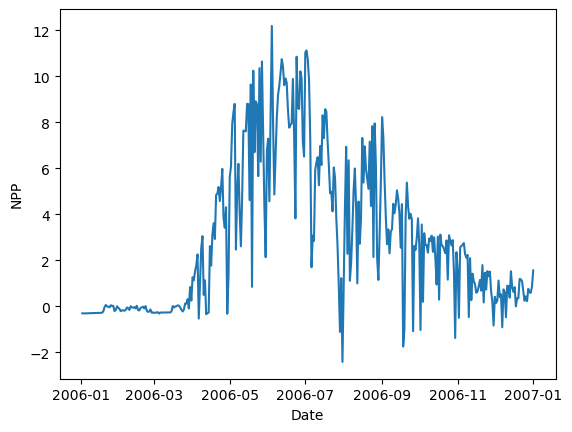

In [90]:
lae_daily_year=cha_daily[(lae_daily['Year'] == 2005)]

plt.plot(lae_daily_year['Date'], lae_daily_year['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

# Application to Davos

            Ta         VPD        SM  PARB  PARD  PAR                Date  \
0      -8.6835   40.321286  0.000000   0.0   0.0  0.0 2004-01-01 00:00:00   
1      -8.8000   78.494890  0.402902   0.0   0.0  0.0 2004-01-01 01:00:00   
2      -8.9670   72.458816  0.395870   0.0   0.0  0.0 2004-01-01 02:00:00   
3      -9.0500   70.960469  0.389250   0.0   0.0  0.0 2004-01-01 03:00:00   
4      -9.5500   62.728724  0.383019   0.0   0.0  0.0 2004-01-01 04:00:00   
...        ...         ...       ...   ...   ...  ...                 ...   
149035 -6.2950  185.782946  0.110803   0.0   0.0  0.0 2020-12-31 19:00:00   
149036 -6.3430  176.417121  0.110805   0.0   0.0  0.0 2020-12-31 20:00:00   
149037 -6.3925  185.053060  0.110801   0.0   0.0  0.0 2020-12-31 21:00:00   
149038 -6.4425  180.934429  0.110783   0.0   0.0  0.0 2020-12-31 22:00:00   
149039 -6.4920  175.172163  0.110754   0.0   0.0  0.0 2020-12-31 23:00:00   

          Date_day  Year  Month  Day  Hour  
0       2004-01-01  2004      

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\1248763836.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(dav), freq='H')


Text(0, 0.5, 'NPP')

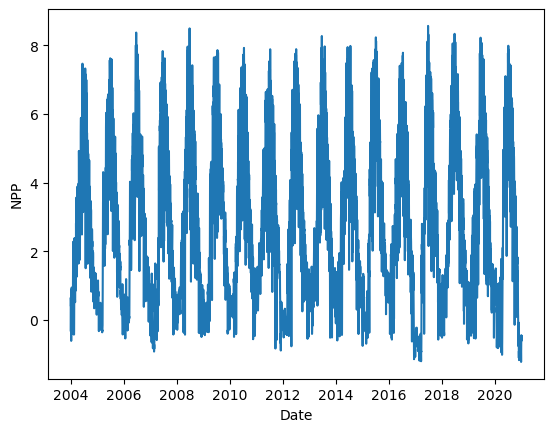

In [92]:
## Load data (1997- 2020)
dav_mat= h5py.File("DAVOS.mat", 'r')
dav_mat

dav = pd.DataFrame(
    { 
        'Ta': dav_mat['Ta'][:].squeeze(),
        'VPD': dav_mat['Ds'][:].squeeze(), #in Pa
        'SM': dav_mat['OH'][0][:].squeeze(), # first soil layer (surface) #high veget #OL=low veget
         'PARB': dav_mat['PARB'][:].squeeze(), #direct radiation
        'PARD': dav_mat['PARD'][:].squeeze(), #diffuse radiation
    }
)
dav['PAR']= dav['PARB'] + dav['PARD']

start_date = '2004-01-01 00:00:00' # de 2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(dav), freq='H')
dav['Date'] = date_range
dav['Date_day'] = dav['Date'].dt.date
dav['Year'] = dav['Date'].dt.year
dav['Month'] = dav['Date'].dt.month
dav['Day'] = dav['Date'].dt.day
dav['Hour'] = dav['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans davMAU alors qu'elles vont jusqu'à 2023 dans les données de base
print(dav)


## Daily mean
# Groupby day to have daily mean
dav_daily = dav.groupby('Date_day')[['Ta','VPD','SM', 'PAR']].mean().reset_index()

#rearrange
dav_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
dav_daily['Date'] = pd.to_datetime(dav_daily['Date'])
dav_daily['Year'] = dav_daily['Date'].dt.year
dav_daily['Month'] = dav_daily['Date'].dt.month
dav_daily['Day'] = dav_daily['Date'].dt.day

dav_daily['NPP'] = dav_mat['NPP_H'][1][1:] #high because mixed deciduous mountain forest #there were 2 columns, I took the one with positive values

plt.plot(dav_daily['Date'], dav_daily['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

<Axes: >

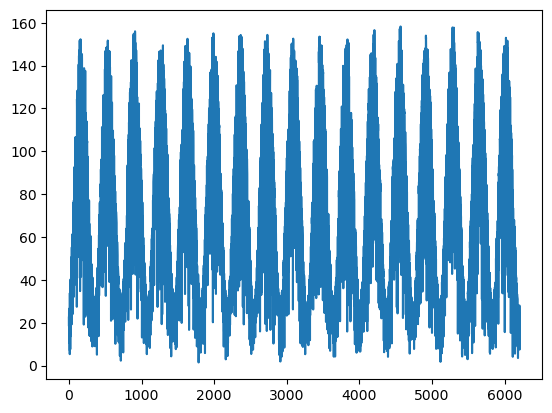

In [99]:
dav_daily['PAR'].plot()

           Date         Ta          VPD        SM         PAR  Year  Month  \
160  2004-06-09  16.170146  1153.220756  0.385863  152.291955  2004      6   
161  2004-06-10  16.281313   967.065593  0.387937  127.408896  2004      6   
178  2004-06-27  15.394417   919.643941  0.412053  107.265418  2004      6   
198  2004-07-17  15.004917   851.195649  0.423837  113.531103  2004      7   
199  2004-07-18  16.286792   913.659642  0.414980  127.557367  2004      7   
...         ...        ...          ...       ...         ...   ...    ...   
6072 2020-08-16  15.277667   592.372124  0.221117   75.719133  2020      8   
6076 2020-08-20  17.616208   825.719576  0.219986  125.254784  2020      8   
6077 2020-08-21  18.700917  1027.483149  0.218397  119.038011  2020      8   
6101 2020-09-14  16.010604   791.875195  0.200329   96.322698  2020      9   
6102 2020-09-15  15.356542   644.348928  0.199288   98.075997  2020      9   

      Day       NPP  
160     9  6.530973  
161    10  6.658963

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\128896456.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


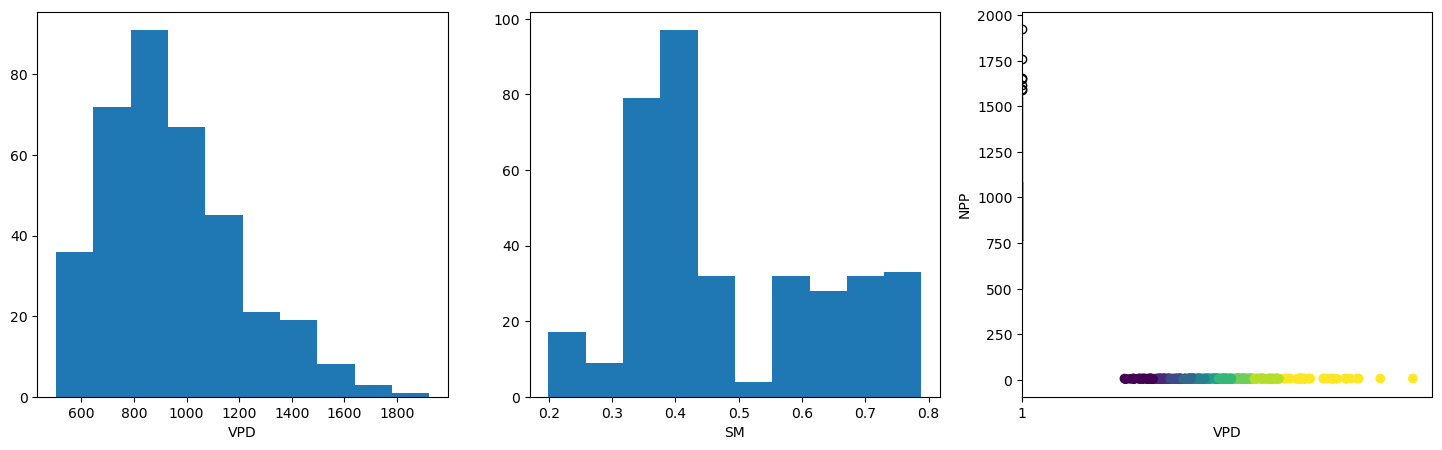

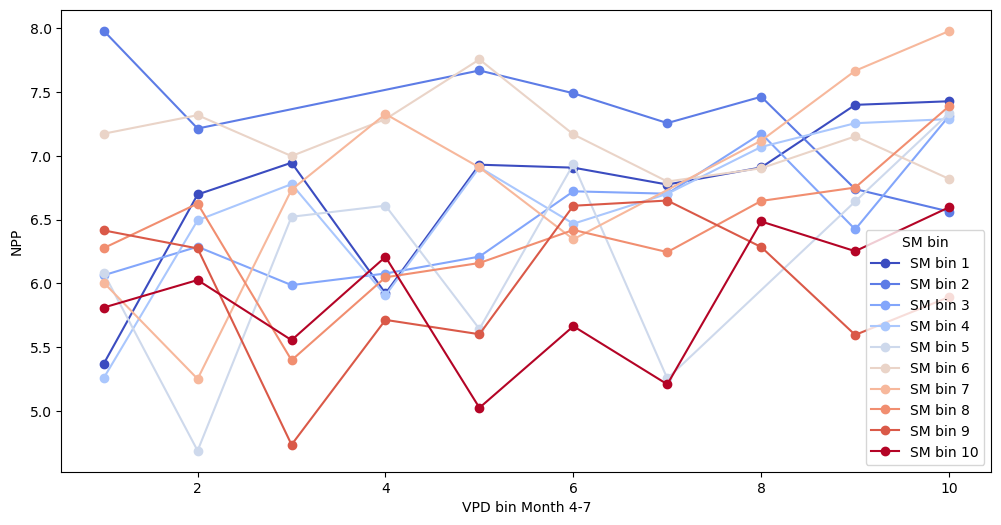

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\128896456.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


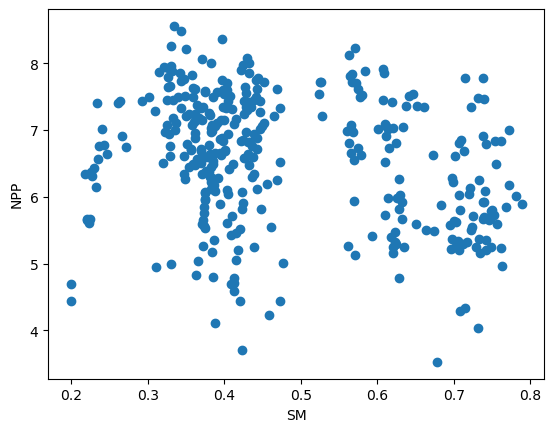

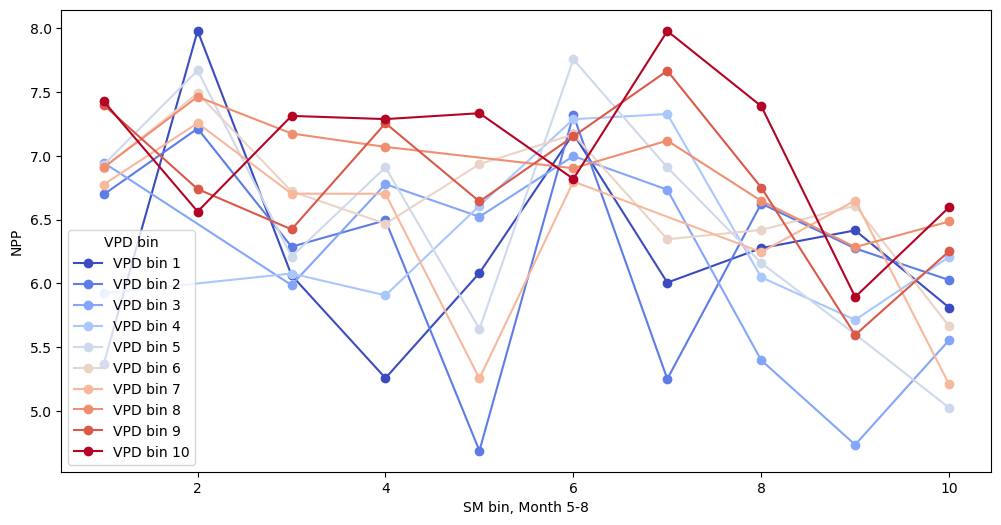

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

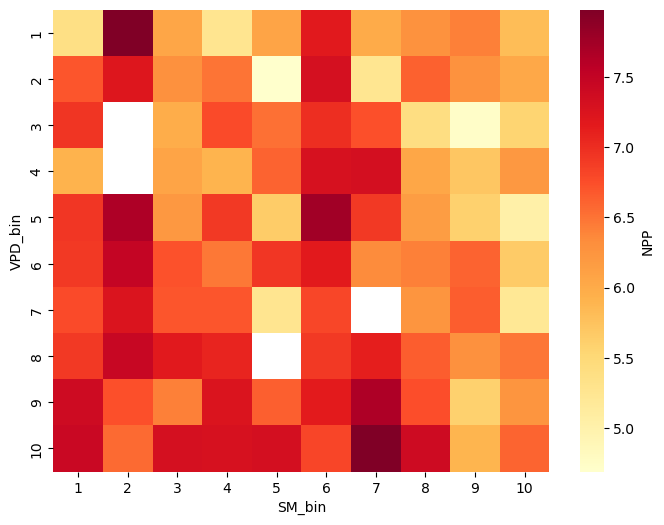

In [ ]:
## Filter data
dav_filtered=dav_daily[(dav_daily['VPD']>500) & (dav_daily['Ta']>15) & (dav_daily['PAR']>60) & (dav_daily['Month'].isin([5,6,7,8, 9, 10]))]
#& (dav_daily['PAR']>60)
#if months are 4-7: more linear relationship
print(dav_filtered)


## Divide in bins
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(dav_filtered['VPD'])
plt.xlabel('VPD')
plt.subplot(1, 3, 2)
plt.hist(dav_filtered['SM'])
plt.xlabel('SM')
plt.subplot(1, 3, 3)
plt.boxplot(dav_filtered['VPD'])
plt.xlabel('VPD')

#Divide in bins
dav_filtered = dav_filtered.copy() #to have an explicit copy (if not it raises an error)
dav_filtered['SM_bin'] = pd.qcut(dav_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
dav_filtered['VPD_bin'] = pd.qcut(dav_filtered['VPD'], q=10, labels=False) + 1
print(dav_filtered)

## Relationships between NPP and VPD
plt.scatter(dav_filtered['VPD'], dav_filtered['NPP'], c=dav_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('NPP')

# for each combination of bins
grouped = dav_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 4-7')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(dav_filtered['SM'], dav_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 5-8')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)

C:\Users\moeag\AppData\Local\Temp\ipykernel_31948\1377945273.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dav_daily_year=cha_daily[(dav_daily['Year'] == 2005)]


Text(0, 0.5, 'NPP')

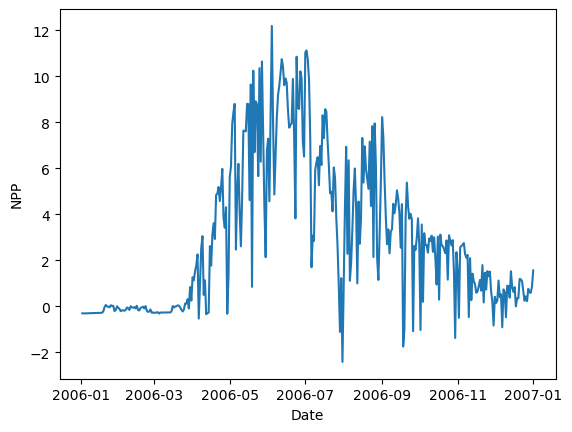

In [91]:
dav_daily_year=cha_daily[(dav_daily['Year'] == 2005)]

plt.plot(dav_daily_year['Date'], dav_daily_year['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

# Merging the 3 stations

            Date         Ta          VPD        SM         PAR  Year  Month  \
144   2005-05-25  16.486125   541.790846  0.394809  139.774863  2005      5   
145   2005-05-26  19.077437   654.859749  0.376440  148.673829  2005      5   
146   2005-05-27  21.047333   690.378347  0.364712  143.816213  2005      5   
147   2005-05-28  21.948625   772.772026  0.354944  150.480336  2005      5   
148   2005-05-29  21.980708   723.018001  0.351671  140.704514  2005      5   
...          ...        ...          ...       ...         ...   ...    ...   
15934 2020-08-16  15.277667   592.372124  0.221117   75.719133  2020      8   
15938 2020-08-20  17.616208   825.719576  0.219986  125.254784  2020      8   
15939 2020-08-21  18.700917  1027.483149  0.218397  119.038011  2020      8   
15963 2020-09-14  16.010604   791.875195  0.200329   96.322698  2020      9   
15964 2020-09-15  15.356542   644.348928  0.199288   98.075997  2020      9   

       Day        NPP       SIF  SM_bin  VPD_bin  


C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\4202935892.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


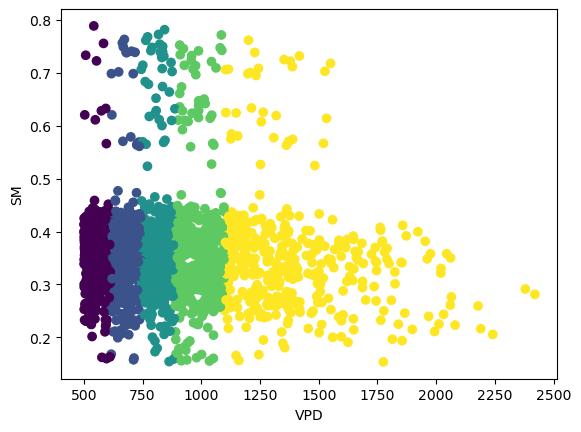

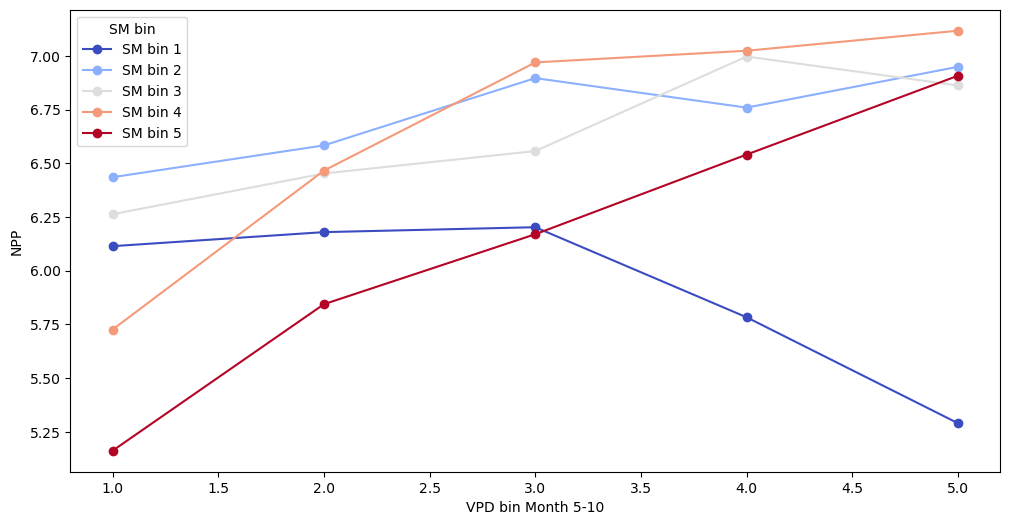

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\4202935892.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


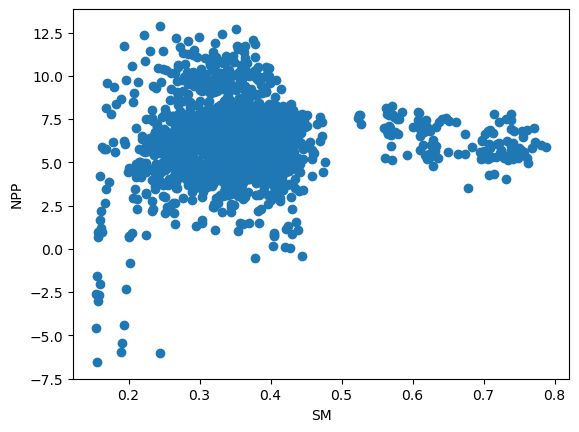

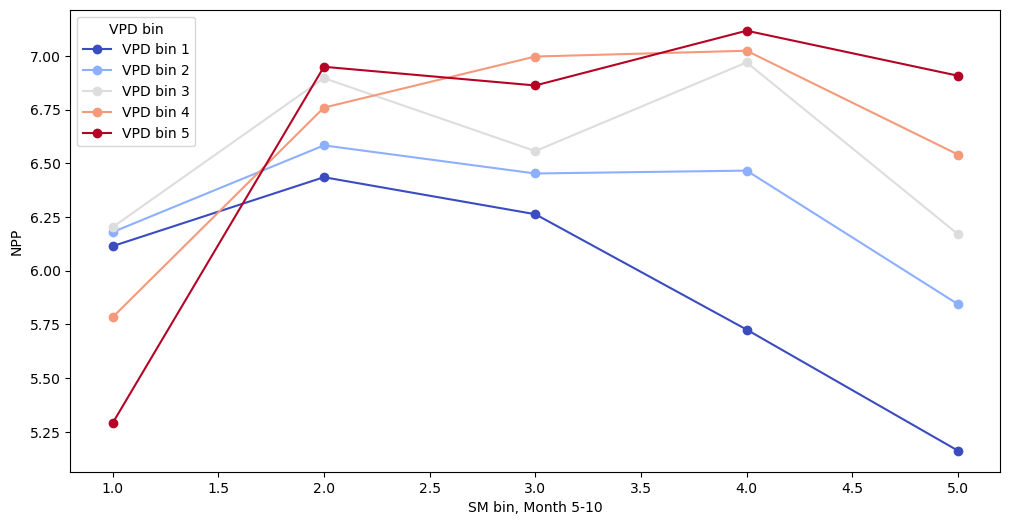

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

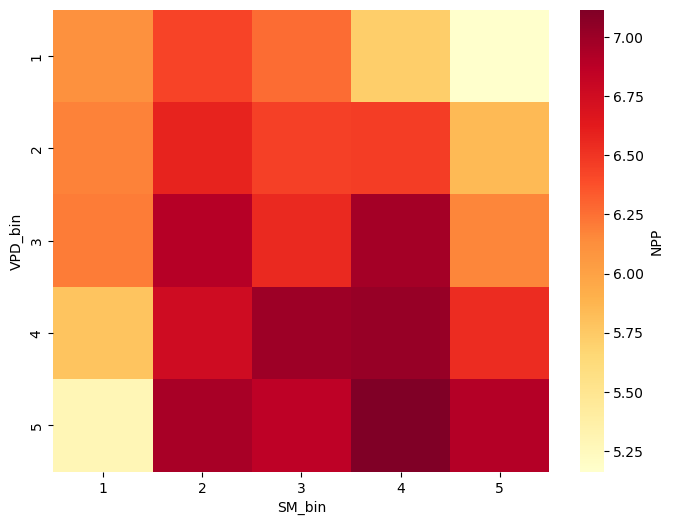

In [ ]:
merged = pd.concat([cha_daily,  lae_daily, dav_daily], ignore_index=True) #dav_daily,

#filter
merged_filtered = merged[(merged['VPD'] > 500) & (merged['Ta'] > 15) & (merged['PAR']>60)& (merged['Month'].isin([5, 6, 7, 8,9,10]))] #growing season according to TA

#Divide in bins
merged_filtered = merged_filtered.copy() #to have an explicit copy (if not it raises an error)
merged_filtered['SM_bin'] = pd.qcut(merged_filtered['SM'], q=5, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
merged_filtered['VPD_bin'] = pd.qcut(merged_filtered['VPD'], q=5, labels=False) + 1
print(merged_filtered)


## Relationships between NPP and VPD
plt.scatter(merged_filtered['VPD'], merged_filtered['SM'], c=merged_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('SM')

# for each combination of bins
merged_grouped = merged_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 5)

for i, sm_bin in enumerate(sorted(merged_grouped['SM_bin'].unique())):
    subset = merged_grouped[merged_grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 5-10')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(merged_filtered['SM'], merged_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

for i, vpd_bin in enumerate(sorted(merged_grouped['VPD_bin'].unique())):
    subset = merged_grouped[merged_grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 5-10')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = merged_grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)


In [45]:

SM_bin_values = merged_filtered.groupby(['SM_bin', 'VPD_bin']).agg(
    mean_NPP=('NPP', 'mean'),
    mean_SM=('SM', 'mean'),
    mean_VPD=('VPD', 'mean'),
    count=('NPP', 'count')  # ou 'size' si tu veux compter même les NaN
).reset_index()

print(SM_bin_values)


# VPD_bin_values = merged_filtered.groupby(['VPD_bin']).agg({
#     'NPP': 'mean',
#     'SM': 'mean',      # Moyenne de SM dans le bin
#     'VPD': 'mean'      # Moyenne de VPD dans le bin
# }).reset_index()
# print(VPD_bin_values)

    SM_bin  VPD_bin  mean_NPP   mean_SM     mean_VPD  count
0        1        1  5.410287  0.220121   521.911664      9
1        1        2  7.044661  0.194097   582.636777     11
2        1        3  5.754453  0.188542   623.606671      8
3        1        4  6.568580  0.194645   688.733071     21
4        1        5  7.922601  0.196334   784.586189      8
..     ...      ...       ...       ...          ...    ...
95      10        6  5.831342  0.420615   851.787458     16
96      10        7  6.321304  0.411408   927.933573     17
97      10        8  6.212377  0.413766  1063.398440      9
98      10        9  6.981708  0.412404  1174.900078      9
99      10       10  7.224252  0.410574  1408.301413      4

[100 rows x 6 columns]


In [43]:
print(merged_filtered)

           Date         Ta          VPD        SM  Year  Month  Day  \
144  2005-05-25  16.486125   541.790846  0.387202  2005      5   25   
145  2005-05-26  19.077437   654.859749  0.369477  2005      5   26   
146  2005-05-27  21.047333   690.378347  0.359195  2005      5   27   
147  2005-05-28  21.948625   772.772026  0.348879  2005      5   28   
148  2005-05-29  21.980708   723.018001  0.347644  2005      5   29   
...         ...        ...          ...       ...   ...    ...  ...   
9731 2020-08-23  18.139104   727.928755  0.304403  2020      8   23   
9732 2020-08-24  17.661250   917.625974  0.292032  2020      8   24   
9733 2020-08-25  18.995167   943.208643  0.281284  2020      8   25   
9734 2020-08-26  20.665083  1105.320222  0.268349  2020      8   26   
9735 2020-08-27  19.054458   906.670883  0.258017  2020      8   27   

            NPP       SIF  SM_bin  VPD_bin  
144   10.096085  0.660965       9        1  
145   10.220479  2.707251       7        3  
146    9.122

# Variation of soil texture
## Load data

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\497026120.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(cha_s), freq='H')


            Ta        VPD        SM  PARB  PARD  PAR                Date  \
0       2.2570   6.134699  0.000000   0.0   0.0  0.0 2005-01-01 00:00:00   
1       2.2945   6.069162  0.419919   0.0   0.0  0.0 2005-01-01 01:00:00   
2       2.2490  13.289646  0.420260   0.0   0.0  0.0 2005-01-01 02:00:00   
3       2.3290  17.970873  0.422095   0.0   0.0  0.0 2005-01-01 03:00:00   
4       2.7175  15.666741  0.423913   0.0   0.0  0.0 2005-01-01 04:00:00   
...        ...        ...       ...   ...   ...  ...                 ...   
140251  1.1260   0.074910  0.340488   0.0   0.0  0.0 2020-12-31 19:00:00   
140252  0.8890   0.000000  0.336041   0.0   0.0  0.0 2020-12-31 20:00:00   
140253  0.1375   0.000000  0.330633   0.0   0.0  0.0 2020-12-31 21:00:00   
140254 -0.6775   0.000000  0.312110   0.0   0.0  0.0 2020-12-31 22:00:00   
140255  0.0565   0.000000  0.306834   0.0   0.0  0.0 2020-12-31 23:00:00   

          Date_day  Year  Month  Day  Hour  
0       2005-01-01  2005      1    1     0

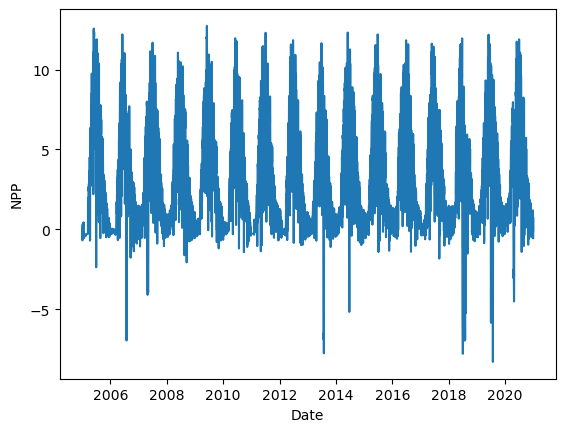

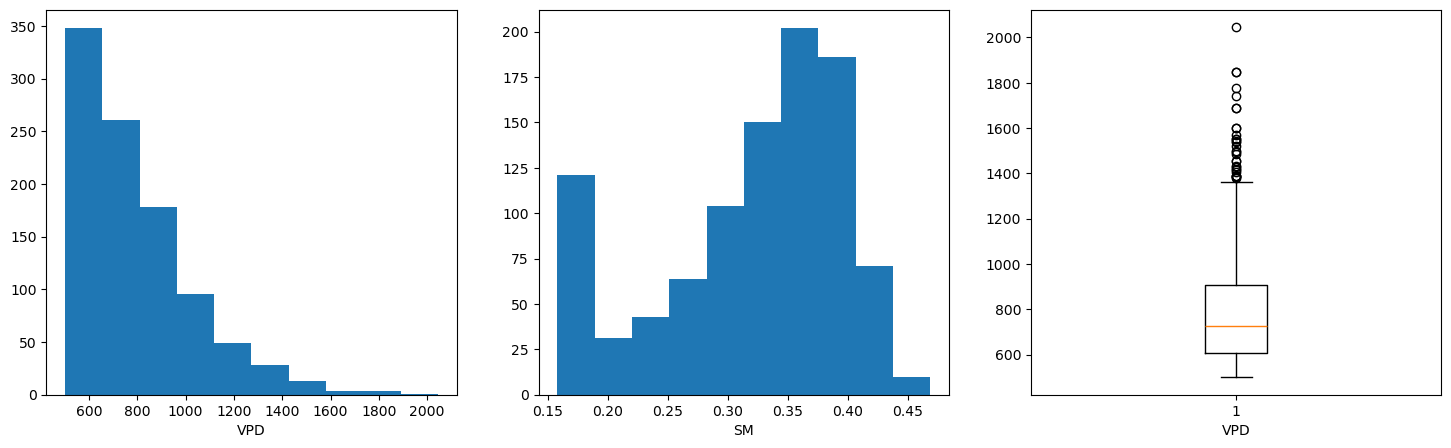

In [140]:
## Load data
cha_s_mat= h5py.File("CHAMAU_Sandy.mat", 'r')
cha_s_mat

cha_s = pd.DataFrame(
    { 
        'Ta': cha_s_mat['Ta'][:].squeeze(),
        'VPD': cha_s_mat['Ds'][:].squeeze(), #in Pa
        'SM': cha_s_mat['OH'][0][:].squeeze(), # first soil layer (surface) #high veget #OL=low veget
         'PARB': cha_s_mat['PARB'][:].squeeze(), #direct radiation
        'PARD': cha_s_mat['PARD'][:].squeeze(), #diffuse radiation
    }
)
cha_s['PAR']= cha_s['PARB'] + cha_s['PARD']

start_date = '2005-01-01 00:00:00' # de 2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(cha_s), freq='H')
cha_s['Date'] = date_range
cha_s['Date_day'] = cha_s['Date'].dt.date
cha_s['Year'] = cha_s['Date'].dt.year
cha_s['Month'] = cha_s['Date'].dt.month
cha_s['Day'] = cha_s['Date'].dt.day
cha_s['Hour'] = cha_s['Date'].dt.hour

#les data ne vont que jusqu'à 2020 dans cha_s alors qu'elles vont jusqu'à 2023 dans les données de base
print(cha_s)


## Daily mean
# Groupby day to have daily mean
cha_s_daily = cha_s.groupby('Date_day')[['Ta','VPD','SM', 'PAR']].mean().reset_index()

#rearrange
cha_s_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
cha_s_daily['Date'] = pd.to_datetime(cha_s_daily['Date'])
cha_s_daily['Year'] = cha_s_daily['Date'].dt.year
cha_s_daily['Month'] = cha_s_daily['Date'].dt.month
cha_s_daily['Day'] = cha_s_daily['Date'].dt.day

cha_s_daily['NPP'] = cha_s_mat['NPP_L'][0][1:] #high because mixed deciduous mountain forest #there were 2 columns, I took the one with positive values

plt.plot(cha_s_daily['Date'], cha_s_daily['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

## Filter data
cha_s_filtered=cha_s_daily[(cha_s_daily['VPD']>500) & (cha_s_daily['Ta']>15) & (cha_s_daily['PAR']>60) & (cha_s_daily['Month'].isin([5,6,7,8, 9, 10]))]
#& (cha_daily['PAR']>75)
#if months are 4-7: more linear relationship
print(cha_s_filtered)


## Divide in bins
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(cha_s_filtered['VPD'])
plt.xlabel('VPD')
plt.subplot(1, 3, 2)
plt.hist(cha_s_filtered['SM'])
plt.xlabel('SM')
plt.subplot(1, 3, 3)
plt.boxplot(cha_s_filtered['VPD'])
plt.xlabel('VPD')

#Divide in bins
cha_s_filtered = cha_s_filtered.copy() #to have an explicit copy (if not it raises an error)
cha_s_filtered['SM_bin'] = pd.qcut(cha_s_filtered['SM'], q=5, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
cha_s_filtered['VPD_bin'] = pd.qcut(cha_s_filtered['VPD'], q=5, labels=False) + 1
print(cha_s_filtered)


## Graph for sandy soil

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\3141387716.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


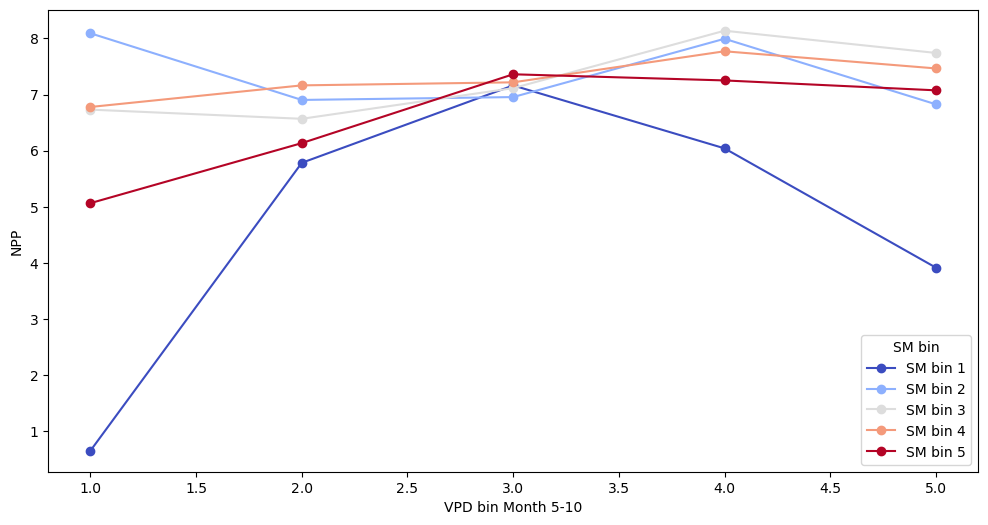

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\3141387716.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


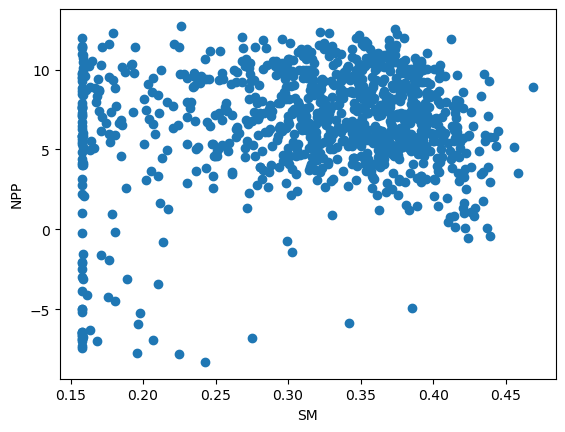

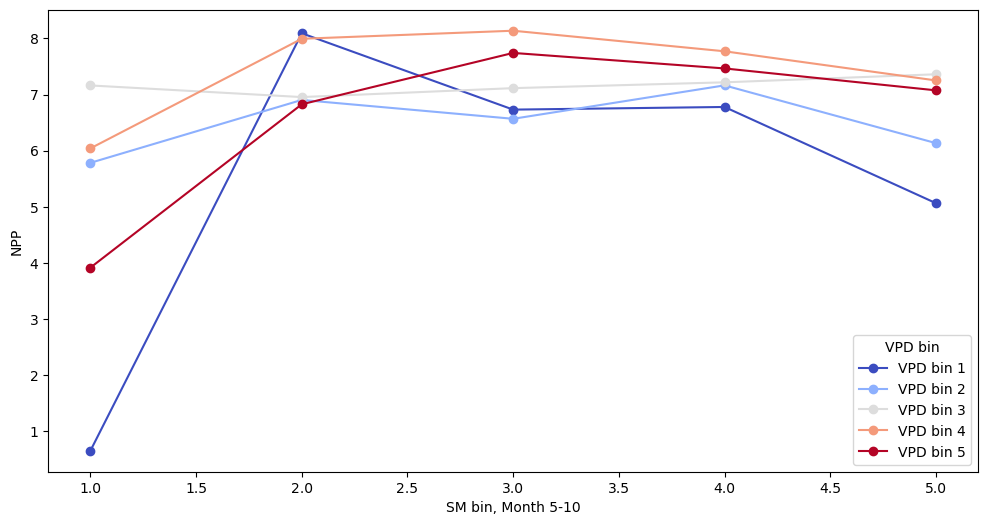

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

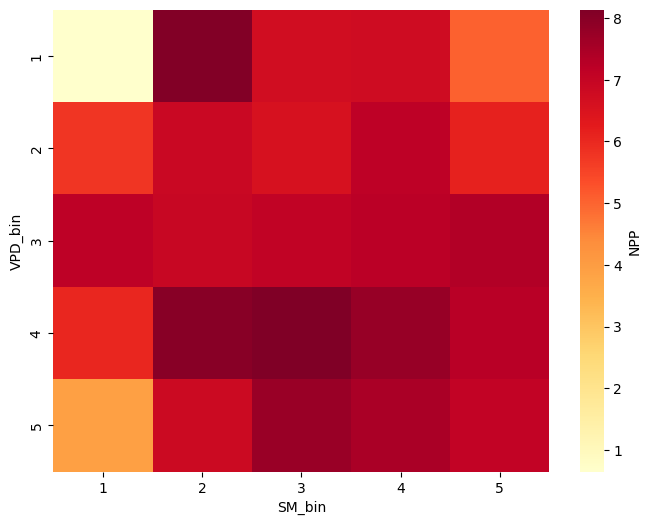

In [141]:

# for each combination of bins
grouped_cha_s = cha_s_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 5)

for i, sm_bin in enumerate(sorted(grouped_cha_s['SM_bin'].unique())):
    subset = grouped_cha_s[grouped_cha_s['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 5-10')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(cha_s_filtered['SM'], cha_s_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

for i, vpd_bin in enumerate(sorted(grouped_cha_s['VPD_bin'].unique())):
    subset = grouped_cha_s[grouped_cha_s['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 5-10')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = grouped_cha_s.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)

## Graph for origin soil

    SM_bin  VPD_bin       NPP       SIF
0        1        1  6.683522  0.032432
1        1        2  6.565439  0.127638
2        1        3  7.035621  0.089738
3        1        4  7.723415  0.118092
4        1        5  5.217210  0.312858
5        2        1  8.803008  0.175782
6        2        2  7.366878  0.126762
7        2        3  8.226578  0.099773
8        2        4  8.415784  0.380856
9        2        5  7.803619  0.300404
10       3        1  7.373554  0.076890
11       3        2  6.413405  0.184582
12       3        3  7.141180  0.374760
13       3        4  7.839072  0.190214
14       3        5  7.600451  0.786323
15       4        1  6.558191  0.156908
16       4        2  7.845463  0.343271
17       4        3  7.376247  0.756075
18       4        4  7.006952  0.477789
19       4        5  8.946174  0.322157
20       5        1  4.831028  0.064759
21       5        2  5.577846  0.117194
22       5        3  6.443768  0.176089
23       5        4  8.403468  0.327743


C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\2093713847.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


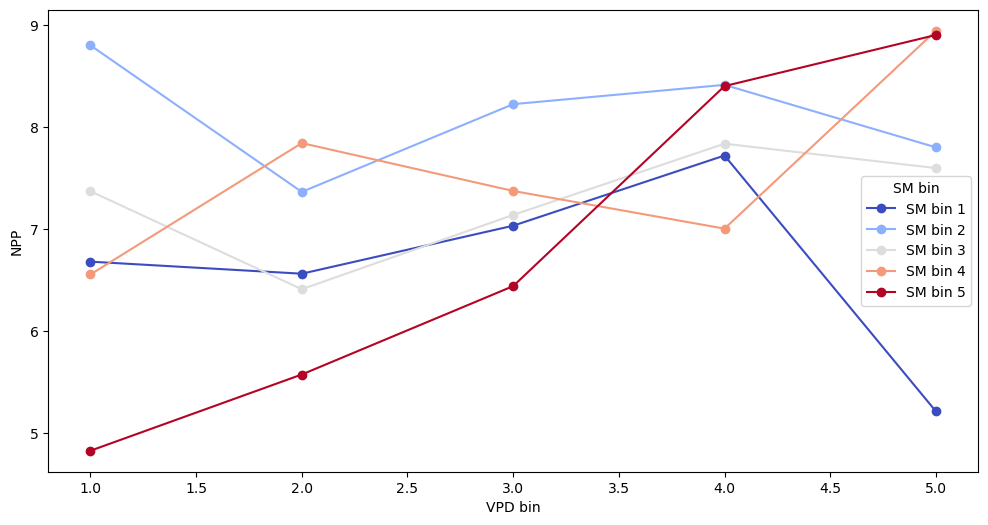

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\2093713847.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


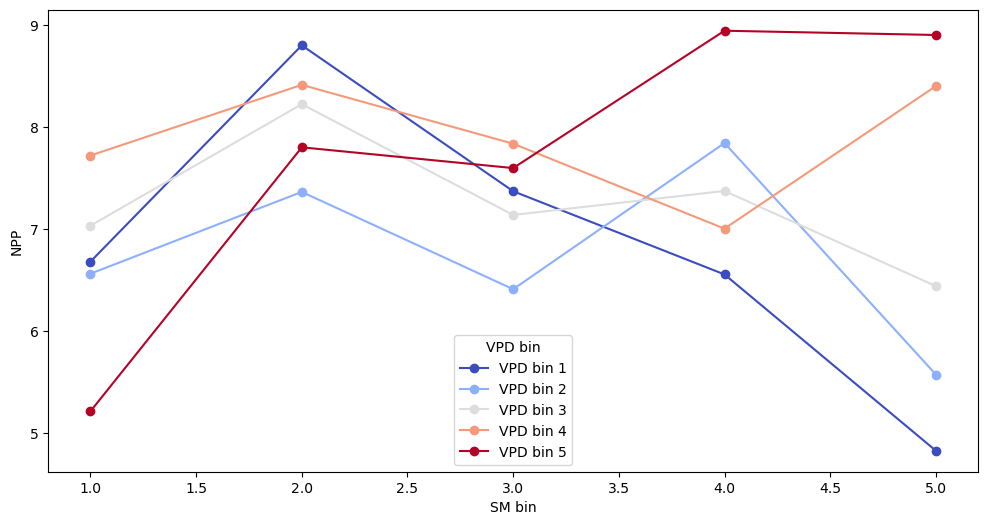

In [142]:
grouped_cha = cha_filtered.groupby(['SM_bin', 'VPD_bin'])[['NPP', 'SIF']].mean().reset_index()
print(grouped_cha)

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 5)

for i, sm_bin in enumerate(sorted(grouped_cha['SM_bin'].unique())):
    subset = grouped_cha[grouped_cha['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin')
plt.ylabel('NPP')
plt.show() 

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

for i, vpd_bin in enumerate(sorted(grouped_cha['VPD_bin'].unique())):
    subset = grouped_cha[grouped_cha['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('NPP')
plt.show() 

## both graphs

C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\3355310886.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


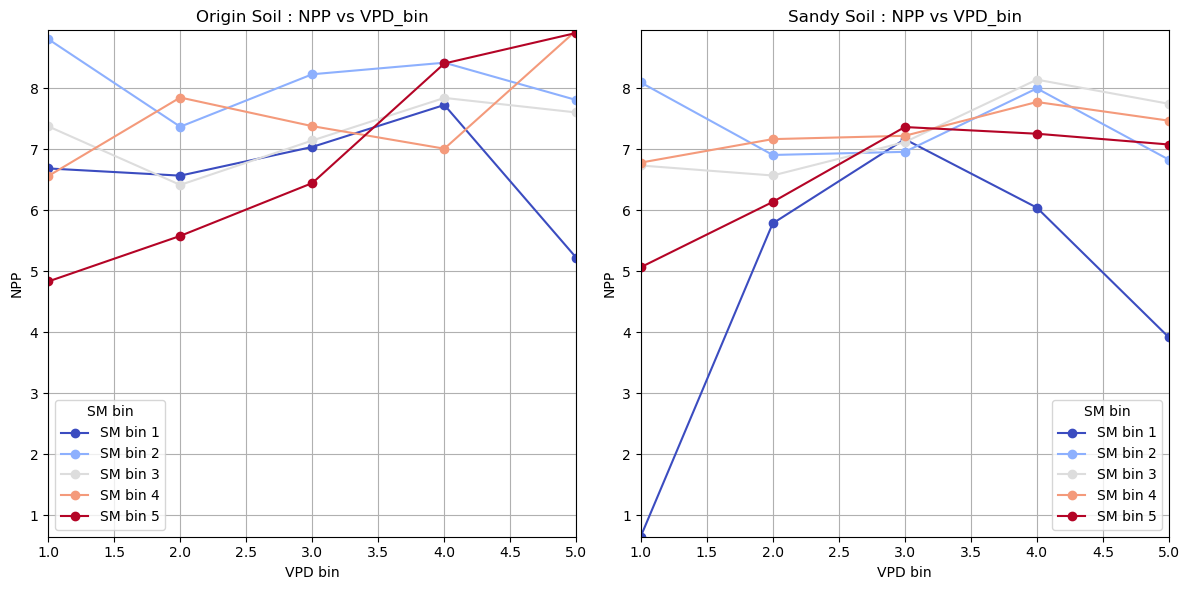

In [145]:
#VPD

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

x_limits = None
y_limits = None

for i, sm_bin in enumerate(sorted(grouped_cha['SM_bin'].unique())):
    subset = grouped_cha[grouped_cha['SM_bin'] == sm_bin]
    color = cmap(i)
    ax1.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )
    if x_limits is None:
        x_limits = [min(subset['VPD_bin']), max(subset['VPD_bin'])]
    else:
        x_limits[0] = min(x_limits[0], min(subset['VPD_bin']))
        x_limits[1] = max(x_limits[1], max(subset['VPD_bin']))
        
    if y_limits is None:
        y_limits = [min(subset['NPP']), max(subset['NPP'])]
    else:
        y_limits[0] = min(y_limits[0], min(subset['NPP']))
        y_limits[1] = max(y_limits[1], max(subset['NPP']))


ax1.legend(title='SM bin')
ax1.set_xlabel('VPD bin')
ax1.set_ylabel('NPP')
ax1.set_title('Origin Soil : NPP vs VPD_bin')
ax1.grid(True)

for i, sm_bin in enumerate(sorted(grouped_cha_s['SM_bin'].unique())):
    subset = grouped_cha_s[grouped_cha_s['SM_bin'] == sm_bin]
    color = cmap(i)
    ax2.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )
    x_limits[0] = min(x_limits[0], min(subset['VPD_bin']))
    x_limits[1] = max(x_limits[1], max(subset['VPD_bin']))
    
    y_limits[0] = min(y_limits[0], min(subset['NPP']))
    y_limits[1] = max(y_limits[1], max(subset['NPP']))

ax2.legend(title='SM bin')
ax2.set_xlabel('VPD bin')
ax2.set_ylabel('NPP')
ax2.set_title('Sandy Soil : NPP vs VPD_bin')
ax2.grid(True)

ax1.set_xlim(x_limits)
ax1.set_ylim(y_limits)
ax2.set_xlim(x_limits)
ax2.set_ylim(y_limits)

plt.tight_layout()
plt.show()



C:\Users\moeag\AppData\Local\Temp\ipykernel_38368\1822849374.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 5)


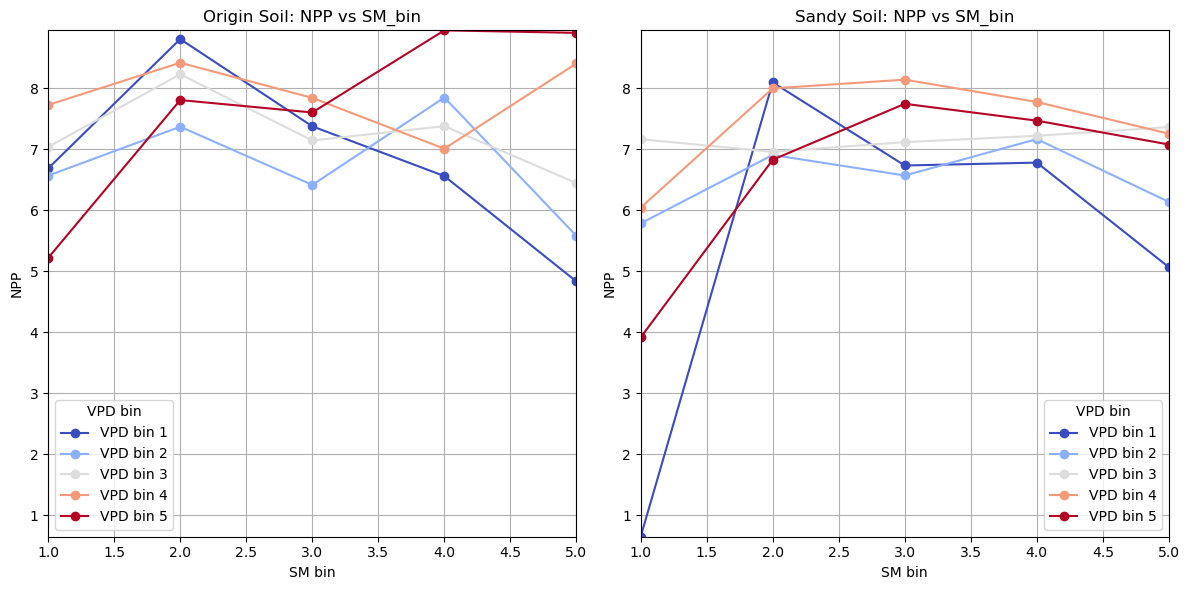

In [146]:
#SM

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 5)

x_limits = None
y_limits = None

for i, vpd_bin in enumerate(sorted(grouped_cha['VPD_bin'].unique())):
    subset = grouped_cha[grouped_cha['VPD_bin'] == vpd_bin]
    color = cmap(i)
    ax1.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
    if x_limits is None:
        x_limits = [min(subset['SM_bin']), max(subset['SM_bin'])]
    else:
        x_limits[0] = min(x_limits[0], min(subset['SM_bin']))
        x_limits[1] = max(x_limits[1], max(subset['SM_bin']))
        
    if y_limits is None:
        y_limits = [min(subset['NPP']), max(subset['NPP'])]
    else:
        y_limits[0] = min(y_limits[0], min(subset['NPP']))
        y_limits[1] = max(y_limits[1], max(subset['NPP']))


ax1.legend(title='VPD bin')
ax1.set_xlabel('SM bin')
ax1.set_ylabel('NPP')
ax1.set_title('Origin Soil: NPP vs SM_bin')
ax1.grid(True)

for i, vpd_bin in enumerate(sorted(grouped_cha_s['VPD_bin'].unique())):
    subset = grouped_cha_s[grouped_cha_s['VPD_bin'] == vpd_bin]
    color = cmap(i)
    ax2.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
    x_limits[0] = min(x_limits[0], min(subset['SM_bin']))
    x_limits[1] = max(x_limits[1], max(subset['SM_bin']))
    
    y_limits[0] = min(y_limits[0], min(subset['NPP']))
    y_limits[1] = max(y_limits[1], max(subset['NPP']))

ax2.legend(title='VPD bin')
ax2.set_xlabel('SM bin')
ax2.set_ylabel('NPP')
ax2.set_title('Sandy Soil: NPP vs SM_bin')
ax2.grid(True)

ax1.set_xlim(x_limits)
ax1.set_ylim(y_limits)
ax2.set_xlim(x_limits)
ax2.set_ylim(y_limits)

plt.tight_layout()
plt.show()

